In [449]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [451]:
plt.rcParams['figure.figsize'] = (9, 6)

In [562]:
train_provider = pd.read_csv('Train-1542865627584.csv')
train_bene = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
train_inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')

In [563]:
test_provider = pd.read_csv('Test-1542969243754.csv')
test_bene = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
test_inpatient = pd.read_csv('Test_Inpatientdata-1542969243754.csv')
test_outpatient = pd.read_csv('Test_Outpatientdata-1542969243754.csv')

In [564]:
train_provider.head(3)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No


In [565]:
#to get the number of fradulant providers
train_provider.PotentialFraud.value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [566]:
#percentage of fradulant data
(506/4904)*100

10.318107667210441

10% of the provider are flagged as fradulant

In [567]:
train_provider.shape

(5410, 2)

In [568]:
train_bene.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


In [569]:
train_inpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [570]:
train_outpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [571]:
train_bene.shape

(138556, 25)

In [572]:
train_inpatient.shape

(40474, 30)

In [573]:
train_outpatient.shape

(517737, 27)

## find the missing values

In [574]:
train_provider.isnull().sum()

Provider          0
PotentialFraud    0
dtype: int64

In [575]:
train_bene.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

DOD column has NaNs

In [576]:
train_inpatient.isna().sum().sort_values(ascending = False)

ClmProcedureCode_6        40474
ClmProcedureCode_5        40465
ClmProcedureCode_4        40358
ClmProcedureCode_3        39509
ClmDiagnosisCode_10       36547
OtherPhysician            35784
ClmProcedureCode_2        35020
ClmProcedureCode_1        17326
OperatingPhysician        16644
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_4         1534
DeductibleAmtPaid           899
ClmDiagnosisCode_3          676
ClmDiagnosisCode_2          226
AttendingPhysician          112
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
ClmDiagnosisCode_1            0
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DischargeDt                   0
DiagnosisGroupCode            0
BeneID                        0
dtype: int64

In [577]:
train_outpatient.isna().sum().sort_values(ascending = False)

ClmProcedureCode_6        517737
ClmProcedureCode_5        517737
ClmProcedureCode_4        517735
ClmProcedureCode_3        517733
ClmProcedureCode_2        517701
ClmProcedureCode_1        517575
ClmDiagnosisCode_10       516654
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_5        443393
OperatingPhysician        427120
ClmAdmitDiagnosisCode     412312
ClmDiagnosisCode_4        392141
OtherPhysician            322691
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_1         10453
AttendingPhysician          1396
DeductibleAmtPaid              0
InscClaimAmtReimbursed         0
Provider                       0
ClaimEndDt                     0
ClaimStartDt                   0
ClaimID                        0
BeneID                         0
dtype: int64

In [578]:
#Creating a new column if the person is deceased(if deseases 1, else 0)
train_bene['isdecesed'] = np.where(train_bene1[['DOD']].isnull().all(axis = 1), 0,1)

In [579]:
#drop the DOD column
train_bene.drop(['DOD'], axis = 1, inplace = True)

In [580]:
#drop the ClmProcedureCode_6 from inpatient data as it has only NAs(100% missing values)
train_inpatient.drop(['ClmProcedureCode_6'], axis = 1, inplace = True)

In [581]:
#drop the ClmProcedureCode_6 & ClmProcedureCode_5 from outpatient data as it has only NAs(100% missing values)
train_outpatient.drop(['ClmProcedureCode_6', 'ClmProcedureCode_5'], axis = 1, inplace = True)

In [582]:
train_inpatient.ClmDiagnosisCode_4.unique()

array(['7843', nan, '34590', ..., '53649', 'V5412', '7392'], dtype=object)

In [583]:
#Create a new variable noPhysician for both inpatient and outpatientif attending physician, operating and 
#other physician all are NaN
train_inpatient['noPhysician'] = train_inpatient[['AttendingPhysician','OperatingPhysician', 'OtherPhysician']]\
                                .isna().all(axis =1)

train_outpatient['noPhysician'] = train_outpatient[['AttendingPhysician','OperatingPhysician', 'OtherPhysician']]\
                                .isna().all(axis =1)


In [584]:
train_inpatient['noPhysician'].value_counts()

False    40368
True       106
Name: noPhysician, dtype: int64

In [585]:
train_outpatient['noPhysician'].value_counts()

False    516360
True       1377
Name: noPhysician, dtype: int64

In [586]:
#replacing missing values with None for all 3 physician  variables(inpatient)
train_inpatient[['AttendingPhysician','OperatingPhysician', 'OtherPhysician']] = train_inpatient[['AttendingPhysician',
                                                    'OperatingPhysician', 'OtherPhysician']].fillna('None')

In [587]:
#replacing missing values with None for all 3 physician  variables(outpatient)
train_outpatient[['AttendingPhysician','OperatingPhysician', 'OtherPhysician']] = train_outpatient[['AttendingPhysician',
                                                    'OperatingPhysician', 'OtherPhysician']].fillna('None')

In [588]:
#replacing missing values with 0 (inpatient)
train_inpatient[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 
                 'ClmProcedureCode_5', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'DeductibleAmtPaid' ]] = \
train_inpatient[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 
                 'ClmProcedureCode_5', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'DeductibleAmtPaid' ]].fillna(0)

In [589]:
#replacing missing values with 0 (outpatient)
train_outpatient[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmAdmitDiagnosisCode' ]] = \
train_outpatient[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 
                 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmAdmitDiagnosisCode' ]].fillna(0)

In [590]:
#Checking if any column have missing values
train_inpatient.isna().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
AdmissionDt               0
ClmAdmitDiagnosisCode     0
DeductibleAmtPaid         0
DischargeDt               0
DiagnosisGroupCode        0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
ClmProcedureCode_4        0
ClmProcedureCode_5        0
noPhysician               0
dtype: int64

In [591]:
#Checking if any column have missing values
train_outpatient.isna().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
ClmProcedureCode_4        0
DeductibleAmtPaid         0
ClmAdmitDiagnosisCode     0
noPhysician               0
dtype: int64

## How many medical doctors are there in the train outpatient dataset?

In [592]:
#How many medical doctors are there in the train outpatient dataset?
column_values = train_outpatient[['OperatingPhysician', 'AttendingPhysician', 'OtherPhysician']].values.astype('str')
len(np.unique(column_values))

89771

## How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?

In [593]:
column_values1 = train_inpatient[['OperatingPhysician', 'AttendingPhysician', 'OtherPhysician']].values.astype('str')
len(np.unique(column_values1))

18257

In [594]:
outpatient_docters = np.unique(column_values)
inpatient_docters = np.unique(column_values1)

In [595]:
len(np.intersect1d(outpatient_docters, inpatient_docters))

7290

7290 docters are common between the inpatient and outpatient files

## Merging Data

Creating two files 1)Inpatient file merged with beneficiary and provider files and 2) outpatient file with beneficiary and provider files

In [596]:
merge_inpatient = train_bene.merge(train_inpatient, how = 'inner', on = 'BeneID')

In [597]:
inpatient_train = merge_inpatient.merge(train_provider, how = 'inner', on = 'Provider')

In [598]:
print('The merged inpatient data has', inpatient_train.shape[0], 'patient_records(rows)', inpatient_train.shape[1],
     'features')

The merged inpatient data has 40474 patient_records(rows) 55 features


In [599]:
inpatient_train.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'isdecesed', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5

In [600]:
merge_outpatient = train_bene.merge(train_outpatient, how = 'inner', on = 'BeneID')

In [601]:
outpatient_train = merge_outpatient.merge(train_provider, how = 'inner', on = 'Provider')

In [602]:
print('The merged outpatient data has', outpatient_train.shape[0], 'patient_records(rows)', outpatient_train.shape[1],
     'features')

The merged outpatient data has 517737 patient_records(rows) 51 features


In [603]:
outpatient_train.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'isdecesed', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDia

## Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.

In [604]:
#Change the chronic condition to 1 or 0 encoding from 1, 2

inpatient_train = inpatient_train.replace({'ChronicCond_Alzheimer' :2, 'ChronicCond_Heartfailure' : 2, 
                                         'ChronicCond_KidneyDisease' :2,'ChronicCond_Cancer' :2, 
                                         'ChronicCond_ObstrPulmonary' :2 ,'ChronicCond_Depression' :2,
                                        'ChronicCond_Diabetes' :2, 'ChronicCond_IschemicHeart' :2,
                                         'ChronicCond_Osteoporasis' :2, 'ChronicCond_rheumatoidarthritis' :2,
                                        'ChronicCond_stroke' :2}, 0)


In [605]:
#change the renal disease indicator in binary encoding(0,1)
inpatient_train = inpatient_train.replace({'RenalDiseaseIndicator' :'Y'},1 )

In [606]:
chronic = inpatient_train.columns[inpatient_train.columns.str.contains("Chronic")].tolist()

In [607]:
inpatient_train[chronic].sum()/len(inpatient_train)

ChronicCond_Alzheimer              0.504052
ChronicCond_Heartfailure           0.721821
ChronicCond_KidneyDisease          0.601769
ChronicCond_Cancer                 0.190962
ChronicCond_ObstrPulmonary         0.479147
ChronicCond_Depression             0.502224
ChronicCond_Diabetes               0.802046
ChronicCond_IschemicHeart          0.856698
ChronicCond_Osteoporasis           0.351559
ChronicCond_rheumatoidarthritis    0.360355
ChronicCond_stroke                 0.169837
dtype: float64

In [608]:
#Change the chronic condition to 1 or 0 encoding from 1, 2 for outpatients

outpatient_train = outpatient_train.replace({'ChronicCond_Alzheimer' :2, 'ChronicCond_Heartfailure' : 2, 
                                         'ChronicCond_KidneyDisease' :2,'ChronicCond_Cancer' :2, 
                                         'ChronicCond_ObstrPulmonary' :2 ,'ChronicCond_Depression' :2,
                                        'ChronicCond_Diabetes' :2, 'ChronicCond_IschemicHeart' :2,
                                         'ChronicCond_Osteoporasis' :2, 'ChronicCond_rheumatoidarthritis' :2,
                                        'ChronicCond_stroke' :2}, 0)


In [609]:
#change the renal disease indicator in binary encoding(0,1) for outpatients
outpatient_train = outpatient_train.replace({'RenalDiseaseIndicator' :'Y'},1 )

In [610]:
chronic = outpatient_train.columns[outpatient_train.columns.str.contains("Chronic")].tolist()

In [611]:
outpatient_train[chronic].sum()/len(outpatient_train)

ChronicCond_Alzheimer              0.393880
ChronicCond_Heartfailure           0.580156
ChronicCond_KidneyDisease          0.397167
ChronicCond_Cancer                 0.148292
ChronicCond_ObstrPulmonary         0.299936
ChronicCond_Depression             0.429537
ChronicCond_Diabetes               0.697839
ChronicCond_IschemicHeart          0.751648
ChronicCond_Osteoporasis           0.314996
ChronicCond_rheumatoidarthritis    0.307326
ChronicCond_stroke                 0.096395
dtype: float64

In [619]:
claim_inpatient = inpatient_train.groupby('BeneID')['ClaimID'].count().reset_index()
claim_inpatient.columns = ['BeneID', 'Claimcount']

In [620]:
claim_inpatient.head(3)

,BeneID,Claimcount
0,BENE100002,1
1,BENE100004,1
2,BENE100006,1


In [621]:
inpatient_train['chronic_count'] = inpatient_train[chronic].sum(axis = 1)

In [622]:
chronic_cond = inpatient_train.merge(claim_inpatient, how = 'inner', on = 'BeneID')

In [623]:
chronic_cond.head(3)

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,isdecesed,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,noPhysician,PotentialFraud,chronic_count,Claimcount
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,False,Yes,7,3
1,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,False,No,7,3
2,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,False,No,7,3


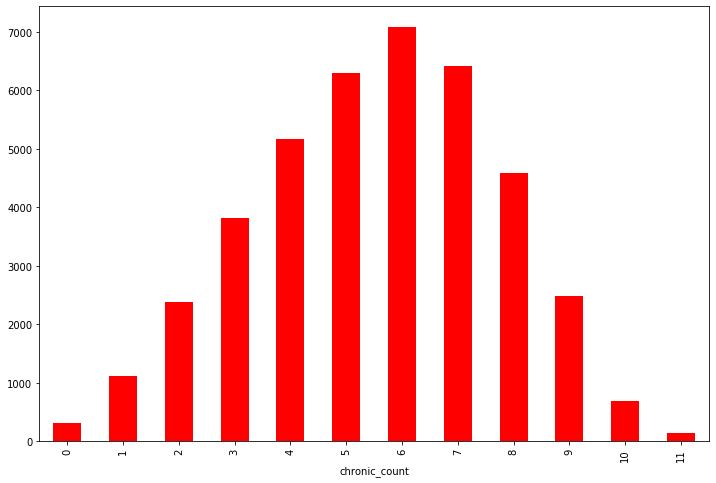

In [624]:
chronic_cond.groupby('chronic_count')['Claimcount'].size().plot.bar(color = 'red')

In [625]:
claim_outpatient = outpatient_train.groupby('BeneID')['ClaimID'].count().reset_index()
claim_outpatient.columns = ['BeneID', 'Claimcount']

In [626]:
outpatient_train['chronic_count'] = outpatient_train[chronic].sum(axis = 1)
chronic_cond2 = outpatient_train.merge(claim_outpatient, how = 'inner', on = 'BeneID')

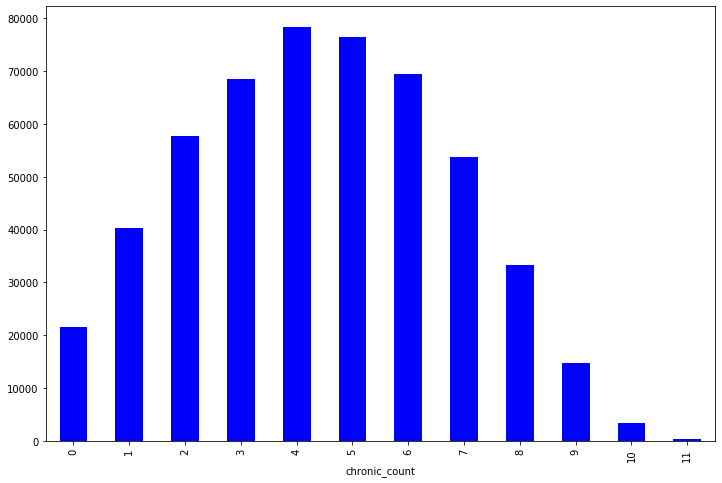

In [627]:
chronic_cond2.groupby('chronic_count')['Claimcount'].size().plot.bar(color = 'blue')

**Compare the inpatient and outpatient with chronic condiion and hospital visits**

In [628]:
inpatient_claim = chronic_cond.groupby('chronic_count')['Claimcount'].size().reset_index()
inpatient_claim.columns = ['chronic_cond', 'visitcount_inpatient']
inpatient_claim

,chronic_cond,visitcount_inpatient
0,0,302
1,1,1120
2,2,2377
3,3,3820
4,4,5177
5,5,6292
6,6,7085
7,7,6421
8,8,4585
9,9,2475


In [629]:
outpatient_claim = chronic_cond2.groupby('chronic_count')['Claimcount'].size().reset_index()
outpatient_claim.columns = ['chronic_cond', 'visitcount_outpatient']
outpatient_claim

,chronic_cond,visitcount_outpatient
0,0,21591
1,1,40210
2,2,57638
3,3,68542
4,4,78284
5,5,76406
6,6,69431
7,7,53754
8,8,33302
9,9,14747


In [630]:
pd.concat([inpatient_claim, outpatient_claim['visitcount_outpatient']], axis = 1)

,chronic_cond,visitcount_inpatient,visitcount_outpatient
0,0,302,21591
1,1,1120,40210
2,2,2377,57638
3,3,3820,68542
4,4,5177,78284
5,5,6292,76406
6,6,7085,69431
7,7,6421,53754
8,8,4585,33302
9,9,2475,14747


In [631]:
t = chronic_cond[chronic_cond['Claimcount'] > 1]
t[chronic].sum()

ChronicCond_Alzheimer              10018
ChronicCond_Heartfailure           13692
ChronicCond_KidneyDisease          12233
ChronicCond_Cancer                  3767
ChronicCond_ObstrPulmonary         10417
ChronicCond_Depression              9706
ChronicCond_Diabetes               14542
ChronicCond_IschemicHeart          15128
ChronicCond_Osteoporasis            6449
ChronicCond_rheumatoidarthritis     6892
ChronicCond_stroke                  3757
dtype: int64

In [632]:
t1 = chronic_cond[chronic_cond['Claimcount'] == 1]
t1[chronic].sum()

ChronicCond_Alzheimer              10383
ChronicCond_Heartfailure           15523
ChronicCond_KidneyDisease          12123
ChronicCond_Cancer                  3962
ChronicCond_ObstrPulmonary          8976
ChronicCond_Depression             10621
ChronicCond_Diabetes               17920
ChronicCond_IschemicHeart          19546
ChronicCond_Osteoporasis            7780
ChronicCond_rheumatoidarthritis     7693
ChronicCond_stroke                  3117
dtype: int64

In [633]:
t2 = chronic_cond2[chronic_cond2['Claimcount'] > 1]
t2[chronic].sum()

ChronicCond_Alzheimer              196013
ChronicCond_Heartfailure           288360
ChronicCond_KidneyDisease          199187
ChronicCond_Cancer                  74189
ChronicCond_ObstrPulmonary         150574
ChronicCond_Depression             213972
ChronicCond_Diabetes               346622
ChronicCond_IschemicHeart          371245
ChronicCond_Osteoporasis           156107
ChronicCond_rheumatoidarthritis    153286
ChronicCond_stroke                  48211
dtype: int64

In [634]:
t3 = chronic_cond2[chronic_cond2['Claimcount'] == 1]
t3[chronic].sum()

ChronicCond_Alzheimer               7913
ChronicCond_Heartfailure           12008
ChronicCond_KidneyDisease           6441
ChronicCond_Cancer                  2587
ChronicCond_ObstrPulmonary          4714
ChronicCond_Depression              8415
ChronicCond_Diabetes               14675
ChronicCond_IschemicHeart          17911
ChronicCond_Osteoporasis            6978
ChronicCond_rheumatoidarthritis     5828
ChronicCond_stroke                  1696
dtype: int64

Patients with chronic condition in outpatients visits more to the docters

## How many distinct patients (BeneIDs) are there in the in/out-patient datasets?

In [635]:
inpatient_train.BeneID.nunique()

31289

In [636]:
outpatient_train.BeneID.nunique()

133980

## Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?

In [637]:
len(inpatient_train.groupby('Provider')['OperatingPhysician'].size() > 1)

2092

In [638]:
OpePhy = inpatient_train[['Provider', 'OperatingPhysician']].rename(columns = {'OperatingPhysician': 'Physician'})
AttePhy = inpatient_train[['Provider', 'AttendingPhysician']].rename(columns = {'AttendingPhysician': 'Physician'})
otherPhy = inpatient_train[['Provider', 'OtherPhysician']].rename(columns = {'OtherPhysician': 'Physician'})

In [639]:
Phy = pd.concat([OpePhy, AttePhy, otherPhy], axis = 0)
Phy.head(2)

,Provider,Physician
0,PRV55912,None
1,PRV55912,PHY370861


In [640]:
len(Phy.groupby('Physician')['Provider'].size())

18257

In [641]:
phy2 = Phy.groupby('Physician')['Provider'].size().drop('None', axis = 0).reset_index() 

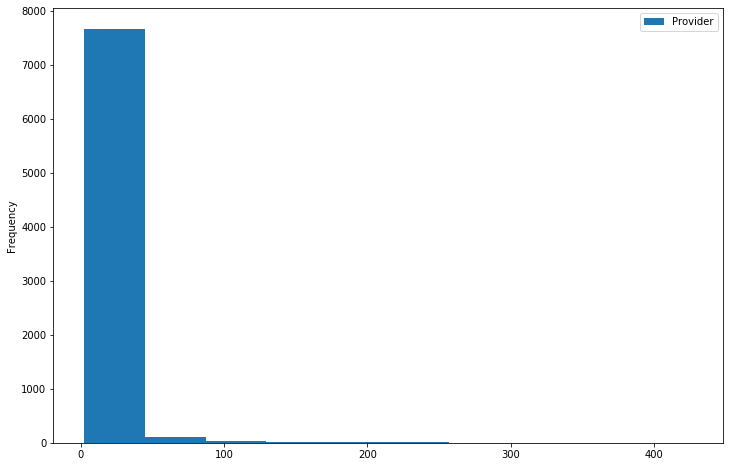

In [642]:
phy2[phy2['Provider'] > 1].plot.hist()

In [643]:
phy2

,Physician,Provider
0,PHY311002,1
1,PHY311007,1
2,PHY311019,1
3,PHY311023,1
4,PHY311028,1
...,...,...
18251,PHY434139,1
18252,PHY434142,1
18253,PHY434143,3
18254,PHY434154,1


In [644]:
phy2[phy2['Provider'] > 1].sort_values(by = 'Provider', ascending = False)

,Physician,Provider
4474,PHY341560,427
16421,PHY422134,386
14881,PHY411541,319
7689,PHY362864,302
470,PHY314410,282
...,...,...
8732,PHY370226,2
8733,PHY370234,2
8737,PHY370256,2
8750,PHY370372,2


In [645]:
inpatient_train[inpatient_train['AttendingPhysician'] == 'PHY411541']

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,isdecesed,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,noPhysician,PotentialFraud,chronic_count
2108,BENE11098,1925-12-01,1,1,1,5,470,12,12,0,1,1,0,1,1,0,1,0,0,0,16000,2136,30,0,0,CLM33470,2009-01-12,2009-01-18,PRV51560,5000,PHY411541,None,None,2009-01-12,78079,1068.0,2009-01-18,183,4822,58381,27800,490,51911,V4501,2809,41400,V1005,0,0.0,0.0,0.0,0.0,0.0,False,Yes,5
2109,BENE11098,1925-12-01,1,1,1,5,470,12,12,0,1,1,0,1,1,0,1,0,0,0,16000,2136,30,0,0,CLM58670,2009-07-07,2009-07-12,PRV51560,11000,PHY411541,PHY411541,None,2009-07-07,4280,1068.0,2009-07-12,302,41011,5849,4280,5853,0388,40390,5363,42983,0,0,9904.0,0.0,0.0,0.0,0.0,False,Yes,5
2110,BENE14178,1972-01-01,1,1,0,5,470,12,12,1,1,0,0,1,1,1,1,0,0,1,5000,2136,3180,500,0,CLM51323,2009-05-16,2009-05-24,PRV51560,0,PHY411541,None,None,2009-05-16,78650,1068.0,2009-05-24,OTH,51884,25000,4019,4439,V4581,4240,32723,2875,7245,0,0.0,0.0,0.0,0.0,0.0,False,Yes,7
2111,BENE14178,1972-01-01,1,1,0,5,470,12,12,1,1,0,0,1,1,1,1,0,0,1,5000,2136,3180,500,0,CLM62580,2009-08-05,2009-08-08,PRV51560,5000,PHY411541,None,None,2009-08-05,49121,1068.0,2009-08-08,179,49122,486,2890,2639,4280,51884,41401,4660,0,0,0.0,0.0,0.0,0.0,0.0,False,Yes,7
2112,BENE14501,1928-11-01,2,3,0,5,200,12,12,1,1,0,0,1,1,1,1,0,1,0,33000,2136,310,190,0,CLM51869,2009-05-20,2009-05-23,PRV51560,8000,PHY411541,None,None,2009-05-20,29634,1068.0,2009-05-23,885,29574,4019,2449,30521,30000,30590,2948,25000,V1581,0,0.0,0.0,0.0,0.0,0.0,False,Yes,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,BENE155294,1945-05-01,1,1,0,5,470,12,12,0,0,1,1,0,1,1,1,0,0,0,9000,1068,830,50,0,CLM53457,2009-05-30,2009-06-11,PRV51560,9000,PHY411541,PHY411541,None,2009-05-30,5849,1068.0,2009-06-11,670,5849,185,5859,42731,3384,7852,2752,5362,5533,E8796,4523.0,0.0,0.0,0.0,0.0,False,Yes,5
2304,BENE155537,1939-09-01,2,2,1,5,470,12,12,1,1,1,0,0,0,1,1,0,0,0,11000,1068,14430,4490,0,CLM63875,2009-08-14,2009-08-17,PRV51560,11000,PHY411541,PHY411541,None,2009-08-14,5780,1068.0,2009-08-17,379,53240,5718,2851,2760,5589,27651,53081,4019,5854,0,4516.0,0.0,0.0,0.0,0.0,False,Yes,5
2305,BENE156272,1924-04-01,1,5,0,5,470,12,12,0,1,0,1,0,0,0,1,1,0,0,18300,1068,50,100,0,CLM37418,2009-02-07,2009-02-10,PRV51560,18000,PHY411541,PHY411541,None,2009-02-07,7230,1068.0,2009-02-10,503,7211,27801,73300,E8490,4280,73382,0,0,0,0,8103.0,0.0,0.0,0.0,0.0,False,Yes,4
2306,BENE156823,1916-03-01,2,1,0,5,470,12,12,0,1,1,0,1,0,1,1,1,1,0,7000,1068,1150,520,0,CLM39869,2009-02-24,2009-02-27,PRV51560,7000,PHY411541,PHY411541,None,2009-02-24,78605,1068.0,2009-02-27,196,49121,4280,25000,4660,V4502,3051,42840,5849,0,0,8857.0,0.0,0.0,0.0,0.0,False,Yes,7


In [646]:
a = inpatient_train.groupby(['PotentialFraud', 'Provider'])['AttendingPhysician'].count().reset_index()

In [647]:
a.columns

Index(['PotentialFraud', 'Provider', 'AttendingPhysician'], dtype='object')

In [648]:
a.head(2)

,PotentialFraud,Provider,AttendingPhysician
0,No,PRV51001,5
1,No,PRV51007,3


In [649]:
def transform_df(agg_col, agg_func, new_colname):
    new_dfname = inpatient_train.groupby(['PotentialFraud','Provider'])[[agg_col]].agg(agg_func)
    new_dfname.columns.values[0] = new_colname
    new_dfname = new_dfname.reset_index()
    return new_dfname

In [650]:
transform_df('AttendingPhysician', 'count', 'op')

,PotentialFraud,Provider,op
0,No,PRV51001,5
1,No,PRV51007,3
2,No,PRV51008,2
3,No,PRV51011,1
4,No,PRV51023,9
...,...,...,...
2087,Yes,PRV57631,18
2088,Yes,PRV57642,23
2089,Yes,PRV57667,3
2090,Yes,PRV57697,48


In [651]:
attphy = inpatient_train.groupby(['PotentialFraud','Provider'])[['AttendingPhysician']].agg('count')
attphy.columns.values[0] = 'attphy_count'
attphy = attphy.reset_index()

In [652]:
inpatient_train.groupby(['PotentialFraud','Provider'])[['AttendingPhysician']].agg('count').max()

AttendingPhysician    516
dtype: int64

Text(0.5, 1.0, 'Number of Attending physician(inpatient) per Provider tagged as Potential Fraud ')

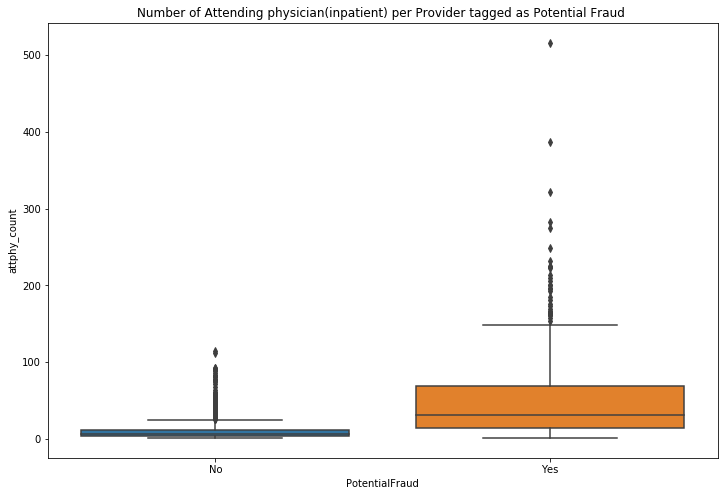

In [653]:
ax = sns.boxplot(data = attphy, x = 'PotentialFraud', y = 'attphy_count')
ax.set_title('Number of Attending physician(inpatient) per Provider tagged as Potential Fraud ')

In [654]:
attphy2 = outpatient_train.groupby(['PotentialFraud','Provider'])[['AttendingPhysician']].agg('count')
attphy2.columns.values[0] = 'attphy2_count'
attphy2 = attphy2.reset_index()

Text(0.5, 1.0, 'Number of Attending physician(outpatient) per Provider tagged as Potential Fraud ')

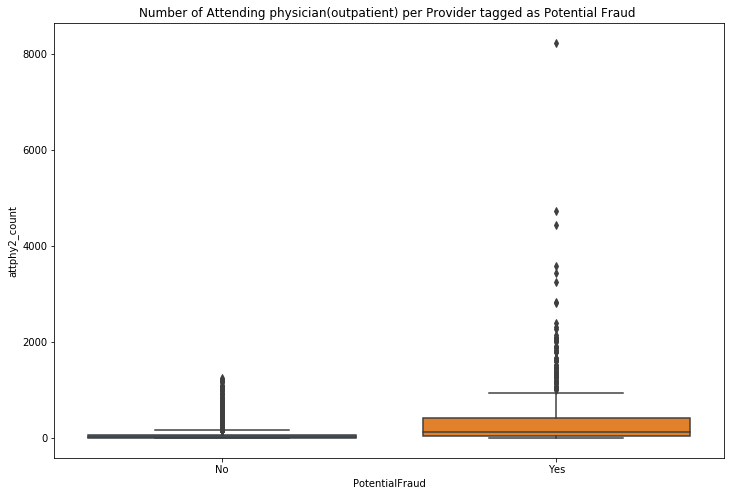

In [655]:
ax = sns.boxplot(data = attphy2, x = 'PotentialFraud', y = 'attphy2_count')
ax.set_title('Number of Attending physician(outpatient) per Provider tagged as Potential Fraud ')

The docters who are connected with different docters are involved in fradulant activity in both inpatients and outpatients

## Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?

In [656]:
patient_provider = inpatient_train.groupby(['BeneID'])[['Provider']].agg('nunique').reset_index()

In [657]:
patient_provider[patient_provider['Provider'] > 1].sort_values(by = 'Provider', ascending = False).head(10)

,BeneID,Provider
16647,BENE30123,5
23606,BENE63935,5
29719,BENE92472,5
19362,BENE43638,5
20539,BENE49263,5
27715,BENE83032,5
21830,BENE55497,5
11975,BENE152105,5
3823,BENE117116,5
28558,BENE87023,5


The inpatients are taking service from 5 (maximum) different providers

In [658]:
patient_provider2 = outpatient_train.groupby(['BeneID'])[['Provider']].agg('nunique').reset_index()

In [659]:
patient_provider2[patient_provider2['Provider'] > 1].sort_values(by = 'Provider', ascending = False).head(10)

,BeneID,Provider
79931,BENE40202,19
21105,BENE122143,17
39873,BENE140999,16
19090,BENE120090,16
52375,BENE153509,16
21079,BENE122118,16
10636,BENE111585,15
6441,BENE107120,15
30359,BENE131419,15
10373,BENE11132,15


The outpatients are taking service from 5 (maximum) different providers

In [660]:
def analysis(df, colname, parameter, newcol):
    df2 = df.groupby(['PotentialFraud','Provider'])[[colname]].agg(parameter)
    df2.columns.values[0] = newcol
    df2 = df2.reset_index()
    return df2
    
def dataplot(newdf, col, plot_title):
    ax = sns.boxplot(data = newdf, x = 'PotentialFraud', y = col)
    ax.set_title(plot_title)
    
    
    
    

In [661]:
#Getting the list of patients who are connected with multiple provider
bene_pro = inpatient_train.groupby('BeneID')['Provider'].nunique().reset_index()
bene_list = bene_pro[bene_pro['Provider'] > 1].BeneID.to_list()

In [740]:
#Assigning 1 or 0 according to the patients who have more than 1 provider
inpatient_train.loc[inpatient_train.BeneID.isin(bene_list),'Multiple_provider'] = 1
inpatient_train.loc[~inpatient_train.BeneID.isin(bene_list),'Multiple_provider'] = 0

In [741]:
#Getting mean of such patients
multiple_bene_provider = analysis(inpatient_train, 'Multiple_provider', 'mean', 'avg_bene')

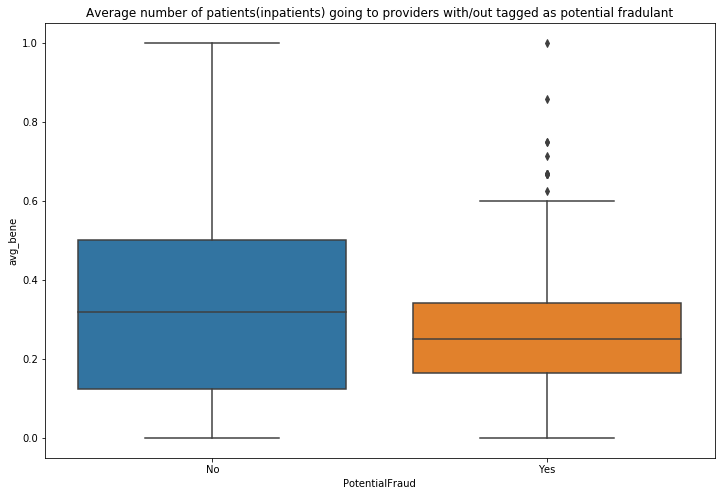

In [664]:
#Plotting
dataplot(multiple_bene_provider, 'avg_bene', 
         'Average number of patients(inpatients) going to providers with/out tagged as potential fradulant')

In [665]:
#Same above analysis for outpatients
bene_pro2 = outpatient_train.groupby('BeneID')['Provider'].nunique().reset_index()
bene_list2 = bene_pro2[bene_pro2['Provider'] > 1].BeneID.to_list()

In [742]:
outpatient_train.loc[outpatient_train.BeneID.isin(bene_list2),'Multiple_provider'] = 1
outpatient_train.loc[~outpatient_train.BeneID.isin(bene_list2),'Multiple_provider'] = 0

In [743]:
multiple_bene_provider2 = analysis(outpatient_train, 'Multiple_provider', 'mean', 'avg_bene')

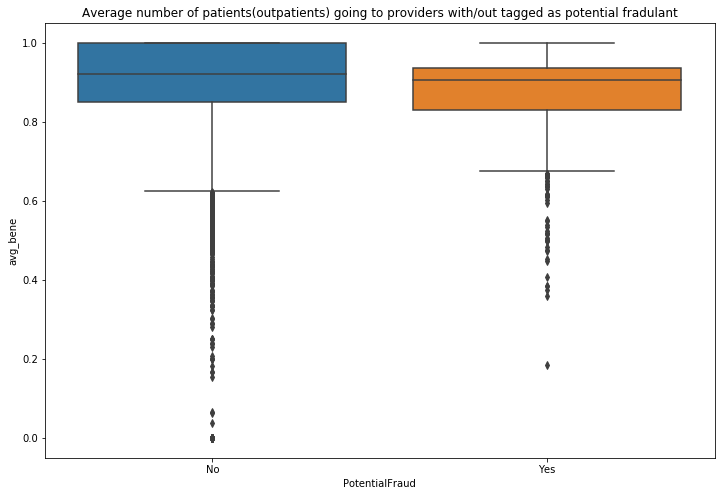

In [668]:
dataplot(multiple_bene_provider2, 'avg_bene', 
         'Average number of patients(outpatients) going to providers with/out tagged as potential fradulant')

The results showed that the inpatients who goes to only one provider are less likely to get cheated.

## Do the same providers provide both inpatient and outpatient services? Summarize your finding.

In [669]:
inpatient_provider = inpatient_train.Provider.to_list()

In [670]:
outpatient_provider = outpatient_train.Provider.to_list()

In [671]:
provider_both = set(inpatient_provider) & set(outpatient_provider)

In [672]:
len(provider_both)

1694

In [747]:
inpatient_train.loc[inpatient_train.Provider.isin(provider_both), 'common_provider'] = 1
inpatient_train.loc[~inpatient_train.Provider.isin(provider_both), 'common_provider'] = 0

Text(0.5, 1.0, 'The number of providers serving both inpatient and outpatient in fradulant and non-fradulant group')

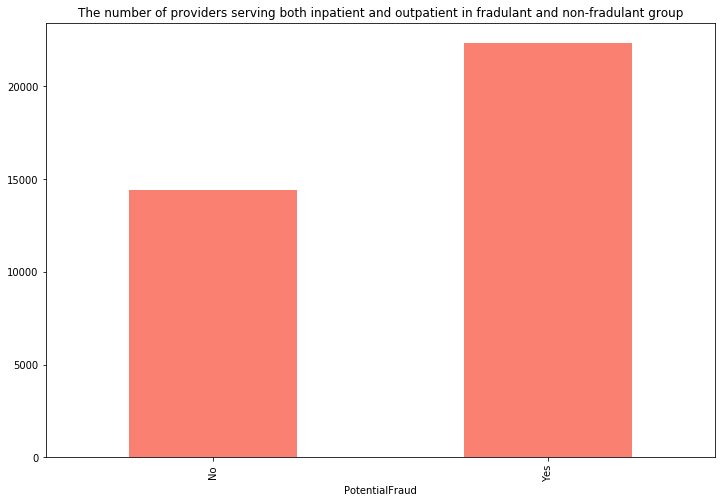

In [748]:
inpatient_train.groupby('PotentialFraud')['common_provider'].sum().plot.bar(color = 'salmon')
plt.title('The number of providers serving both inpatient and outpatient in fradulant and non-fradulant group')

In [675]:
inpatient_train.groupby('PotentialFraud')['both_provider'].sum()

PotentialFraud
No     14420.0
Yes    22307.0
Name: both_provider, dtype: float64

## Do Some of the same patients receive both inpatient and outpatient services? Summarize your finding.

In [676]:
inpatient = inpatient_train.BeneID.to_list()

In [677]:
outpatient = outpatient_train.BeneID.to_list()

In [678]:
common_patient = set(inpatient) & set(outpatient)

In [679]:
len(common_patient)

26713

In [750]:
inpatient_train.loc[inpatient_train.BeneID.isin(common_patient), 'common_patient'] = 1
inpatient_train.loc[~inpatient_train.BeneID.isin(common_patient), 'common_patient'] = 0

Text(0.5, 1.0, 'The number of both patients(inpatient & outpatient) in fradulant and non-fradulant group')

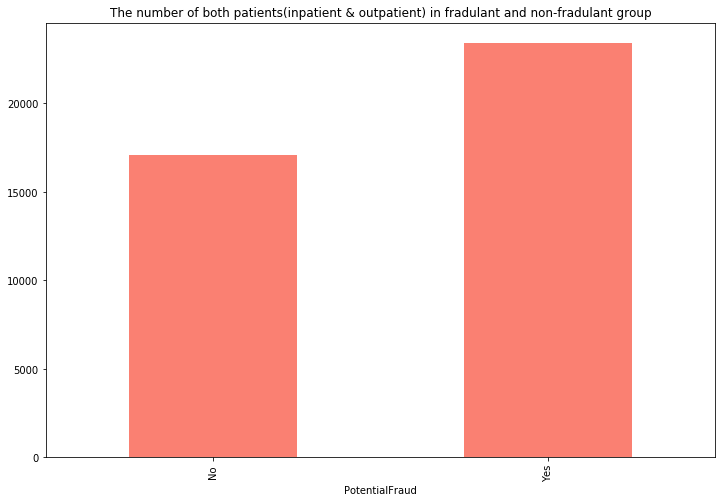

In [751]:
inpatient_train.groupby('PotentialFraud')['common_patient'].count().plot.bar(color = 'salmon')
plt.title('The number of both patients(inpatient & outpatient) in fradulant and non-fradulant group')

In [682]:
inpatient_train.groupby('PotentialFraud')['common_patient'].mean()

PotentialFraud
No     0.859243
Yes    0.870609
Name: common_patient, dtype: float64

## Study the relationship between the patient ages (at the time of their service) and the counts of medical claims.

In [683]:
inpatient_train.head(2)

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,isdecesed,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,noPhysician,PotentialFraud,chronic_count,Multiple_bene,both_provider,common_patient
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,False,Yes,7,1.0,1.0,0.0
1,BENE17521,1913-12-01,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,0,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,False,Yes,5,0.0,1.0,1.0


In [684]:
inpatient_train[['DOB', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']] = \
    inpatient_train[['DOB', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']].apply(pd.to_datetime, 
                                                                                               format ='%Y-%m-%d')

In [685]:
outpatient_train[['DOB', 'ClaimStartDt', 'ClaimEndDt']] = \
    outpatient_train[['DOB', 'ClaimStartDt', 'ClaimEndDt']].apply(pd.to_datetime, format ='%Y-%m-%d')

In [686]:
#Inpatient age
inpatient_train['Age'] = \
inpatient_train['ClaimStartDt'].dt.year.astype(int) - inpatient_train['DOB'].dt.year.astype(int)

In [790]:
inpatient_train['ClaimStartDt'].dt.week.astype(int)

0        15
1         4
2        42
3        43
4         2
         ..
40469    26
40470    36
40471    46
40472     4
40473     8
Name: ClaimStartDt, Length: 40474, dtype: int64

In [687]:
#Outpatient age
outpatient_train['Age'] = \
outpatient_train['ClaimStartDt'].dt.year.astype(int) - outpatient_train['DOB'].dt.year.astype(int)

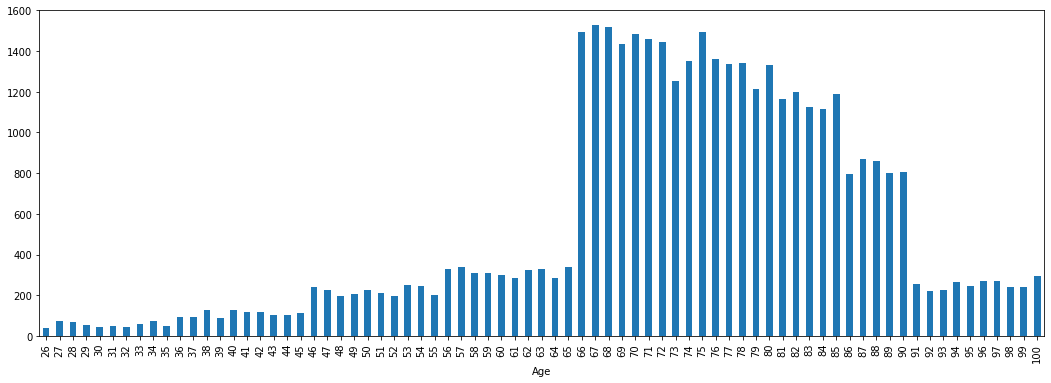

In [688]:
plt.rcParams['figure.figsize'] = (18, 6) 
inpatient_train.groupby('Age')['ClaimID'].count().plot.bar()


In [689]:
age_claim = inpatient_train.groupby(['PotentialFraud', 'Age'])[['ClaimID']].count()
age_claim.columns.values[0] = 'claimcount'

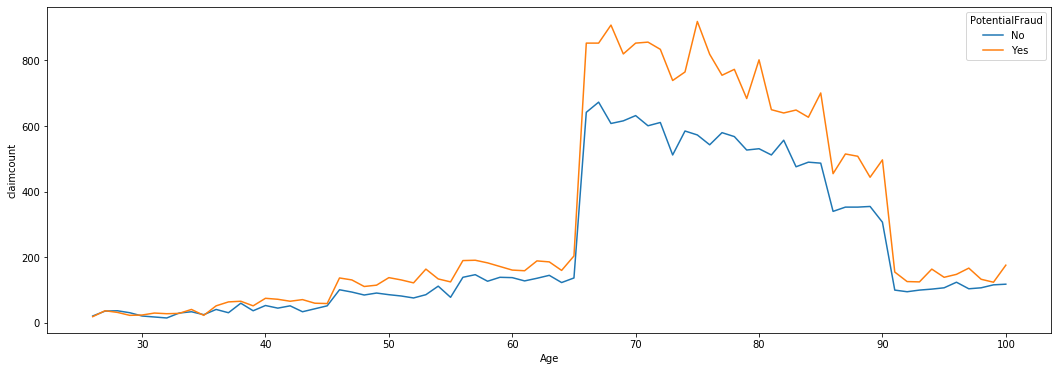

In [690]:
sns.lineplot(data = age_claim, x = 'Age', y = 'claimcount', hue = 'PotentialFraud')

In [691]:
age_claim = outpatient_train.groupby(['PotentialFraud', 'Age'])[['ClaimID']].count()
age_claim.columns.values[0] = 'claimcount'

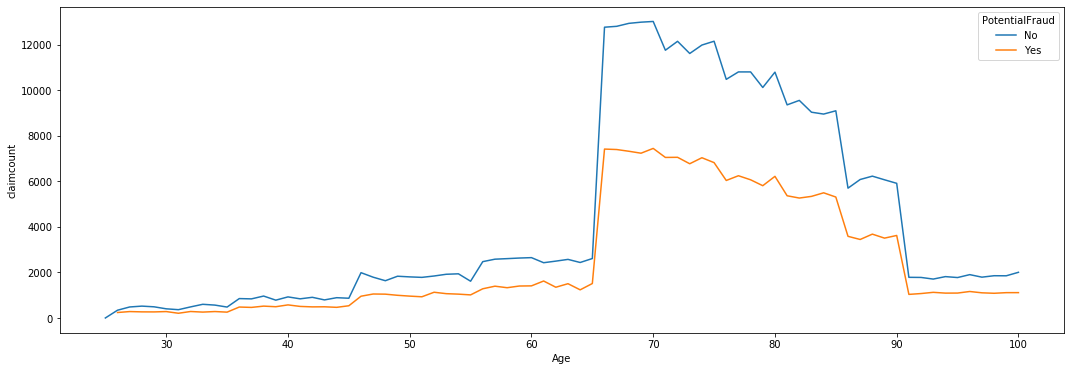

In [692]:
sns.lineplot(data = age_claim, x = 'Age', y = 'claimcount', hue = 'PotentialFraud')

## Study the relationship between the patient age and their chornic conditions. Within the train-samples, do these chronic conditions show a definite trend with respect to increasing ages? 

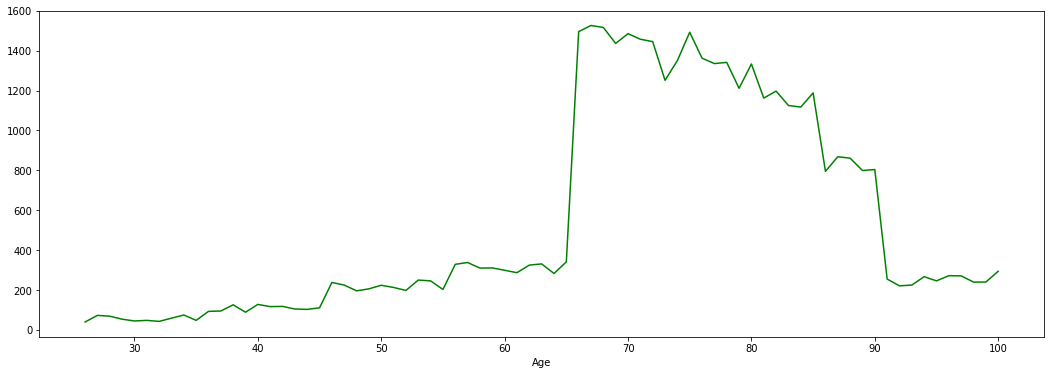

In [693]:
inpatient_train.groupby('Age')['chronic_count'].count().plot.line(color = 'green')

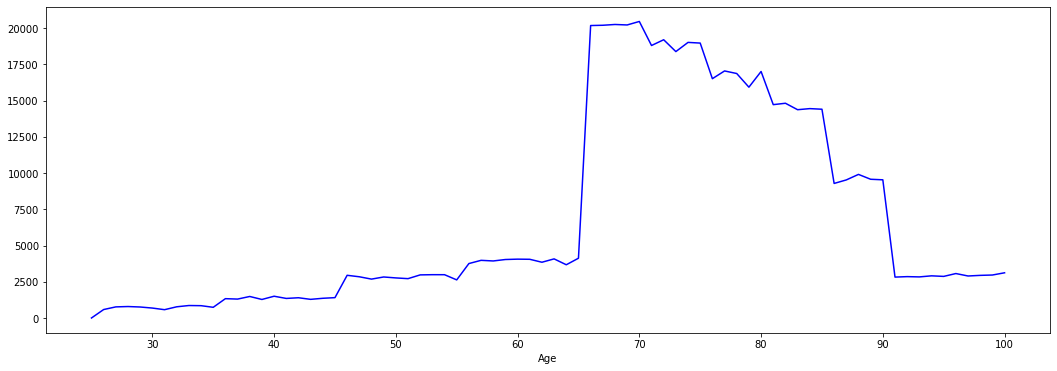

In [694]:
outpatient_train.groupby('Age')['chronic_count'].count().plot.line(color = 'blue')

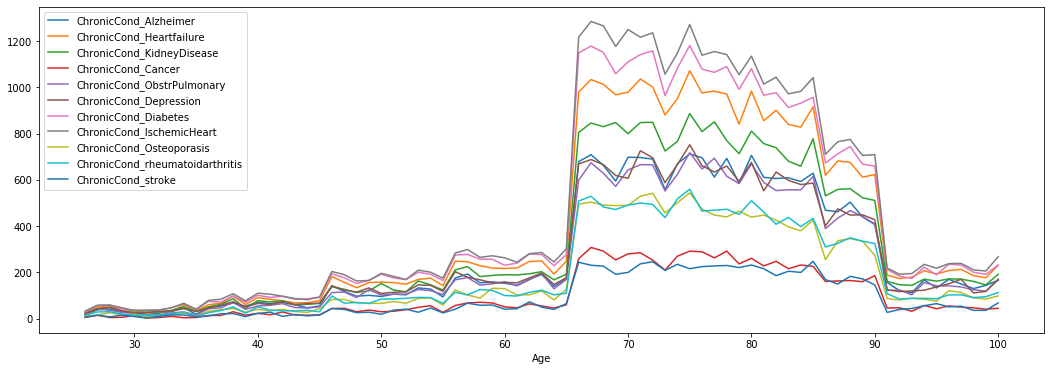

In [695]:
inpatient_train.groupby('Age')[chronic].sum().plot.line()

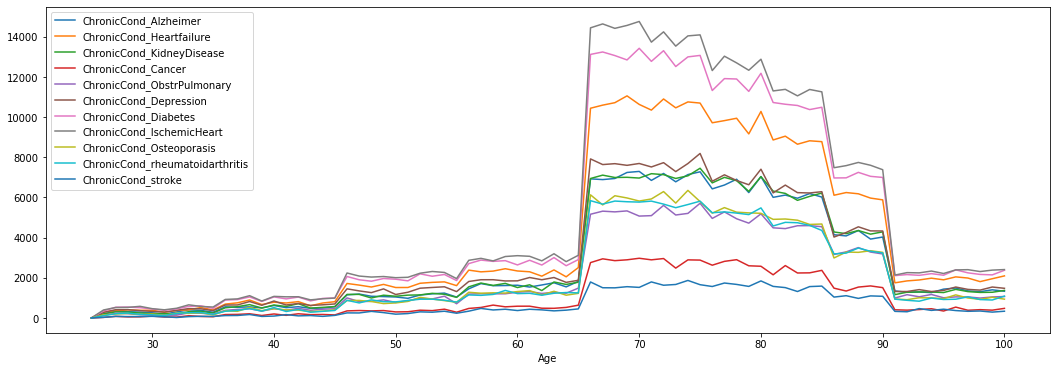

In [696]:
outpatient_train.groupby('Age')[chronic].sum().plot.line()

## In order to make sure the insurance premiums can cover the claims, the insurance company would need to categorize the patients according to their resource usage. In answering the question that what types of patients would make more inpatient visits, please provide your finding.

In [697]:
inpatient_train.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,isdecesed,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,noPhysician,PotentialFraud,chronic_count,Multiple_bene,both_provider,common_patient,Age
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,False,Yes,7,1.0,1.0,0.0,66
1,BENE17521,1913-12-01,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,0,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,False,Yes,5,0.0,1.0,1.0,96
2,BENE21718,1922-10-01,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,0,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,False,Yes,2,0.0,1.0,1.0,87
3,BENE22934,1930-07-01,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,0,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,0,0,0,8154.0,0.0,0.0,0.0,0.0,False,Yes,6,1.0,1.0,1.0,79
4,BENE24402,1925-09-01,2,2,0,39,510,12,12,1,0,0,1,0,0,0,1,0,0,0,3000,1068,8900,740,0,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,None,2009-01-08,1748,1068.0,2009-01-12,593,2330,0,0,0,0,0,0,0,0,0,8543.0,0.0,0.0,0.0,0.0,False,Yes,3,0.0,1.0,1.0,84


In [698]:
#gettig the dataframe with number of visit count
visit_in = inpatient_train.groupby('BeneID')[['ClaimID']].count()
visit_in.columns.values[0] = 'visit_count'
visit_in = visit_in.reset_index()

In [699]:
visit_in.head()

,BeneID,visit_count
0,BENE100002,1
1,BENE100004,1
2,BENE100006,1
3,BENE100007,1
4,BENE100010,2


In [700]:
visit_in.groupby('visit_count')['visit_count'].count()

visit_count
1    24281
2     5396
3     1198
4      303
5       78
6       27
7        5
8        1
Name: visit_count, dtype: int64

In [701]:
#selecting only more than 5 visits
visit5 = visit_in[visit_in['visit_count'] >= 5]

In [702]:
#merging with inpatient data
high_visit = inpatient_train.merge(visit5, how = 'inner', on = 'BeneID')

In [703]:
#Changing the potential fraud to 1,0
high_visit['PotentialFraud']  = np.where(high_visit['PotentialFraud'] == 'Yes', 0, 1)

In [704]:
high_visit.shape

(595, 61)

In [705]:
#test correlation between the number of visits with other features
corr_features = high_visit[high_visit.columns[1:]].corr()['visit_count'][:]

Text(0.5, 1.0, 'Correlation of number of visits(more than 4) with all features')

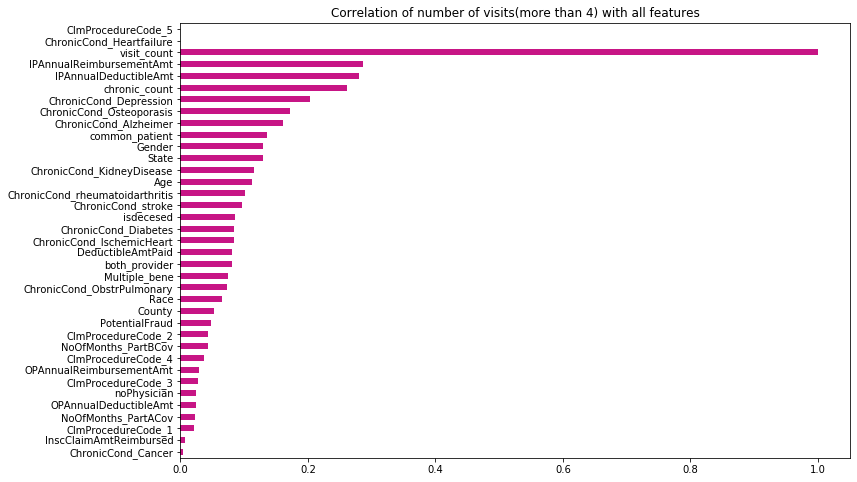

In [706]:
plt.rcParams['figure.figsize'] = (12, 8)
np.abs(corr_features).sort_values().plot(kind = 'barh',color = 'mediumvioletred')
plt.title('Correlation of number of visits(more than 4) with all features')

Interestingly the number of patients who have visited frquently(more than 4 times) are dead and have heart patients

In [724]:
visit = inpatient_train.merge(visit_in, how = 'inner', on = 'BeneID')

In [725]:
visit['PotentialFraud']  = np.where(visit['PotentialFraud'] == 'Yes', 0, 1)

In [709]:
full_corr = visit[visit.columns[1:]].corr()['visit_count'][:]

In [710]:
visit['visit_count'].value_counts()

1    24281
2    10792
3     3594
4     1212
5      390
6      162
7       35
8        8
Name: visit_count, dtype: int64

Text(0.5, 1.0, 'Correlation of number of visits with all features')

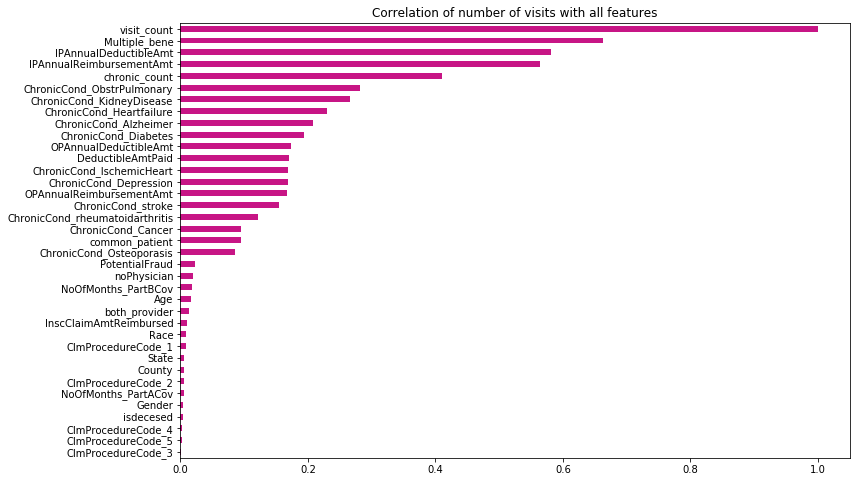

In [716]:
np.abs(full_corr).sort_values().plot(kind = 'barh',color = 'mediumvioletred')
plt.title('Correlation of number of visits with all features')

The inpatients visit depends on the number of docters the patients are consulting, Deductible amount, Reimbursement amount and number of chronic condition.

## In answering what types of patients would make more outpatient service claims, please provide your findings.

In [719]:
#gettig the dataframe with number of visit count
visit_out = outpatient_train.groupby('BeneID')[['ClaimID']].count()
visit_out.columns.values[0] = 'visit_count'
visit_out = visit_out.reset_index()

In [720]:
visit2 = outpatient_train.merge(visit_out, how = 'inner', on = 'BeneID')

In [723]:
visit2['PotentialFraud']  = np.where(visit2['PotentialFraud'] == 'Yes', 0, 1)

In [726]:
visit2['visit_count'].value_counts()

4     58432
3     56496
5     54360
6     49650
2     49562
7     44261
8     37392
1     33631
9     31752
10    25620
11    19965
12    15912
13    12077
14     9520
15     6465
16     4048
17     3128
18     1746
19     1254
20      760
21      546
22      352
23      322
24      168
27      108
25      100
29       58
26       52
Name: visit_count, dtype: int64

In [727]:
full_corr2 = visit2[visit2.columns[1:]].corr()['visit_count'][:]

Text(0.5, 1.0, 'Correlation of number of visits with all features')

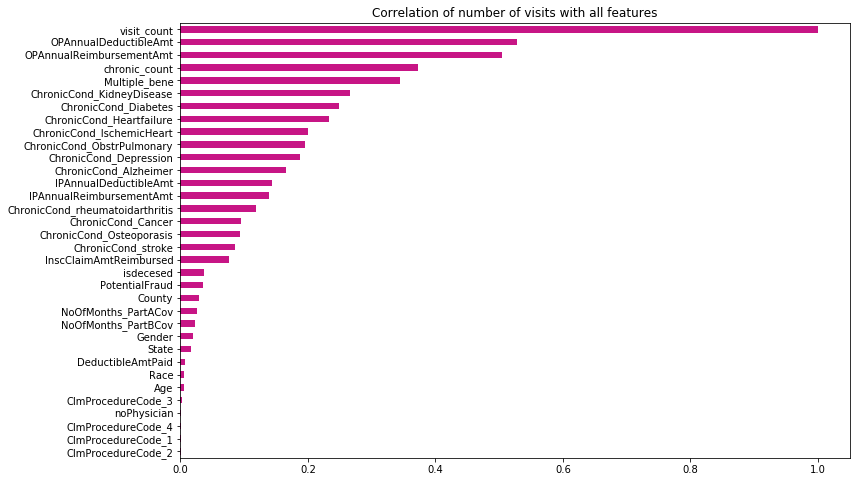

In [728]:
np.abs(full_corr2).sort_values().plot(kind = 'barh',color = 'mediumvioletred')
plt.title('Correlation of number of visits with all features')

The number of factors deciding the number of visits the docter are same as that in case of inpatients. 

## From the prospect of the insurance company, the reimbursed amounts are their coverage on the claims. Please analyze the patterns of the total reimbursed amounts (or average reimbursed amounts/visit) vs different types of patients.

In [730]:
inpatient_train.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'isdecesed', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5

In [734]:
inpatient_train.groupby('BeneID')[['BeneID']].size().sort_values(ascending = False)

BeneID
BENE134170    8
BENE64791     7
BENE117116    7
BENE121796    7
BENE119457    7
             ..
BENE44546     1
BENE44548     1
BENE44550     1
BENE44567     1
BENE100002    1
Length: 31289, dtype: int64

In [765]:
inpatient_train[inpatient_train['BeneID'] == 'BENE134170']

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,isdecesed,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,noPhysician,PotentialFraud,chronic_count,Multiple_bene,both_provider,common_patient,Age
29550,BENE134170,1969-05-01,2,1,1,44,110,12,12,1,1,1,0,1,1,1,1,0,1,0,92860,6408,2990,450,0,CLM33864,2009-01-14,2009-01-16,PRV56481,20000,PHY320466,PHY382067,None,2009-01-14,73028,1068.0,2009-01-16,501,1985,2449,2859,27542,5939,99591,5856,5990,0,0,7749.0,0.0,0.0,0.0,0.0,False,Yes,8,1.0,1.0,1.0,40
29551,BENE134170,1969-05-01,2,1,1,44,110,12,12,1,1,1,0,1,1,1,1,0,1,0,92860,6408,2990,450,0,CLM35952,2009-01-28,2009-02-07,PRV56481,31000,PHY311769,PHY418889,PHY418889,2009-01-28,V5789,1068.0,2009-02-07,940,V5789,71536,V4581,1950,78609,4254,5533,4280,78820,0,9702.0,0.0,0.0,0.0,0.0,False,Yes,8,1.0,1.0,1.0,40
29552,BENE134170,1969-05-01,2,1,1,44,110,12,12,1,1,1,0,1,1,1,1,0,1,0,92860,6408,2990,450,0,CLM38013,2009-02-11,2009-02-19,PRV56481,12000,PHY342586,PHY418889,None,2009-02-11,5589,1068.0,2009-02-19,336,5579,3310,53541,2639,4401,71590,5849,99592,70710,0,4542.0,0.0,0.0,0.0,0.0,False,Yes,8,1.0,1.0,1.0,40
29553,BENE134170,1969-05-01,2,1,1,44,110,12,12,1,1,1,0,1,1,1,1,0,1,0,92860,6408,2990,450,0,CLM74817,2009-11-05,2009-11-11,PRV56481,13000,PHY403429,None,None,2009-11-05,3510,0.0,2009-11-11,094,25060,4280,20302,5363,3970,25080,71536,4019,2768,0,0.0,0.0,0.0,0.0,0.0,False,Yes,8,1.0,1.0,1.0,40
29554,BENE134170,1969-05-01,2,1,1,44,110,12,12,1,1,1,0,1,1,1,1,0,1,0,92860,6408,2990,450,0,CLM74818,2009-11-05,2009-11-15,PRV56481,8000,PHY316067,PHY316067,None,2009-11-05,7804,1068.0,2009-11-15,485,7140,56400,V5867,3051,2768,36970,70715,3536,2767,0,3893.0,7054.0,0.0,0.0,0.0,False,Yes,8,1.0,1.0,1.0,40
29555,BENE134170,1969-05-01,2,1,1,44,110,12,12,1,1,1,0,1,1,1,1,0,1,0,92860,6408,2990,450,0,CLM77335,2009-11-25,2009-12-12,PRV56481,0,PHY418889,None,None,2009-11-25,0389,0.0,2009-12-12,OTH,7812,4280,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,False,Yes,8,1.0,1.0,1.0,40
29556,BENE134170,1969-05-01,2,1,1,44,110,12,12,1,1,1,0,1,1,1,1,0,1,0,92860,6408,2990,450,0,CLM78551,2009-12-05,2009-12-08,PRV56481,6000,PHY388352,PHY431193,None,2009-12-05,78650,1068.0,2009-12-08,259,78659,V4581,412,4019,3051,53550,32723,40291,53081,0,8952.0,0.0,0.0,0.0,0.0,False,Yes,8,1.0,1.0,1.0,40
29567,BENE134170,1969-05-01,2,1,1,44,110,12,12,1,1,1,0,1,1,1,1,0,1,0,92860,6408,2990,450,0,CLM51306,2009-05-15,2009-05-27,PRV56408,0,PHY314739,None,None,2009-05-15,28262,1068.0,2009-05-27,803,2858,V122,496,53081,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,False,No,8,1.0,1.0,1.0,40


In [739]:
Reim_in = inpatient_train.drop_duplicates('BeneID')

In [754]:
inpatient_train.drop(['Multiple_provider', 'both_patients', 'common_provider'], axis = 1, inplace = True)

In [759]:
#Characterstics of patients
#Gender, Race,Age, State, chronic_count, Multiple_provider, common_patients
char_inpatients = ['Gender', 'Race','Age', 'State', 'chronic_count', 'Multiple_bene', 'common_patient']

In [763]:
for feature in char_inpatients:
    charact = Reim_in.groupby(feature)[['IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt']].mean()
    print (charact)

        IPAnnualReimbursementAmt  OPAnnualReimbursementAmt
Gender                                                    
1                   14237.052032               1648.637727
2                   14201.372068               1692.065066
      IPAnnualReimbursementAmt  OPAnnualReimbursementAmt
Race                                                    
1                 14168.572239               1650.658268
2                 14766.530098               1924.352348
3                 13948.722015               1451.688433
5                 13907.577741               1750.834697
     IPAnnualReimbursementAmt  OPAnnualReimbursementAmt
Age                                                    
26               13457.187500               2025.937500
27               14306.428571               1295.357143
28               15229.583333               1832.916667
29               13412.051282               2169.487179
30               13493.428571               2223.142857
..                        ... 

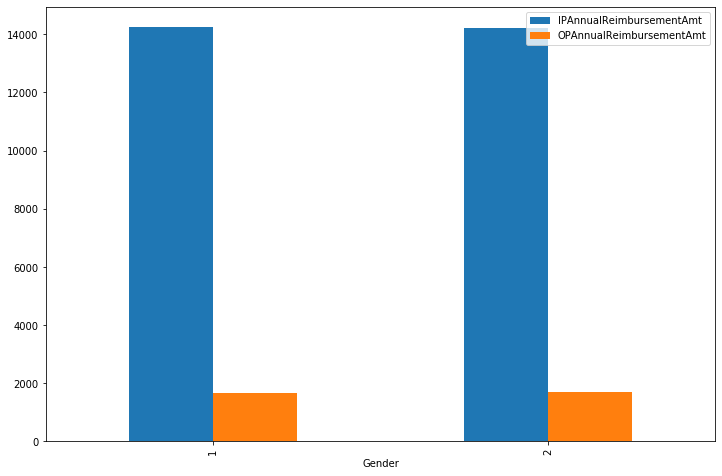

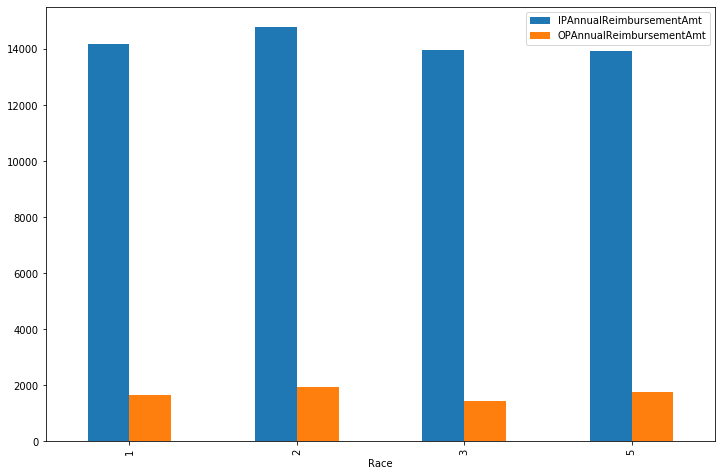

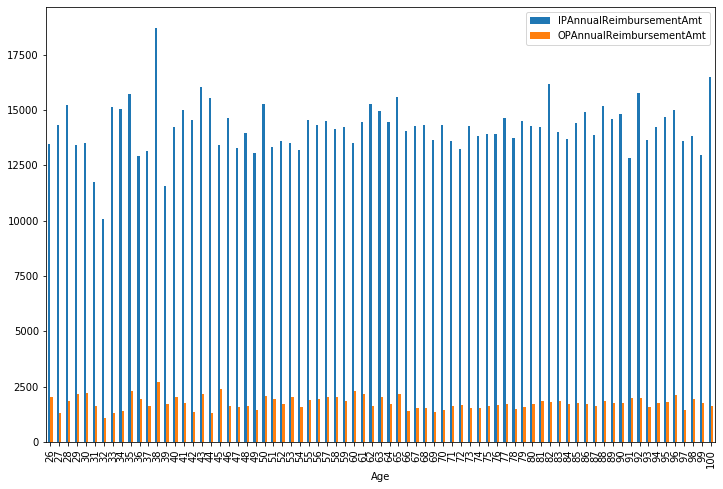

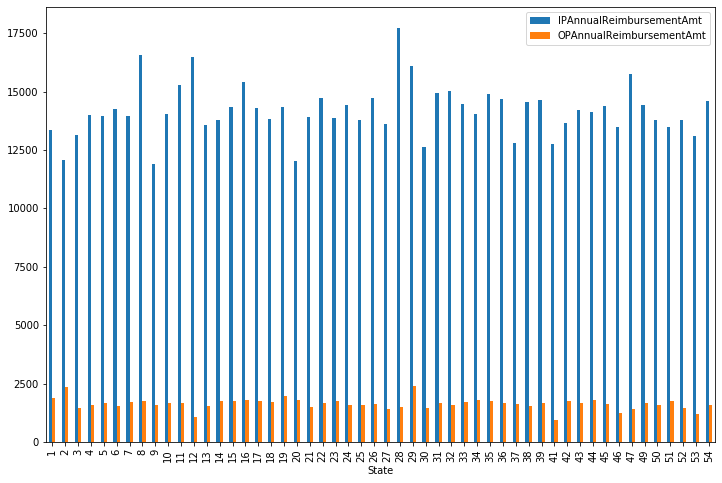

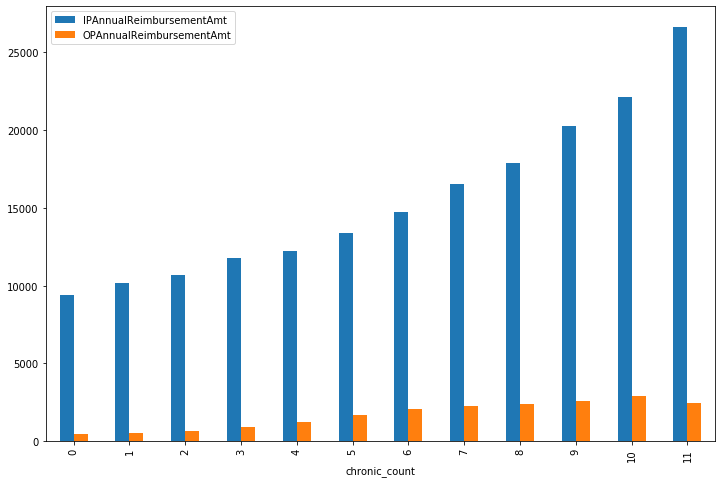

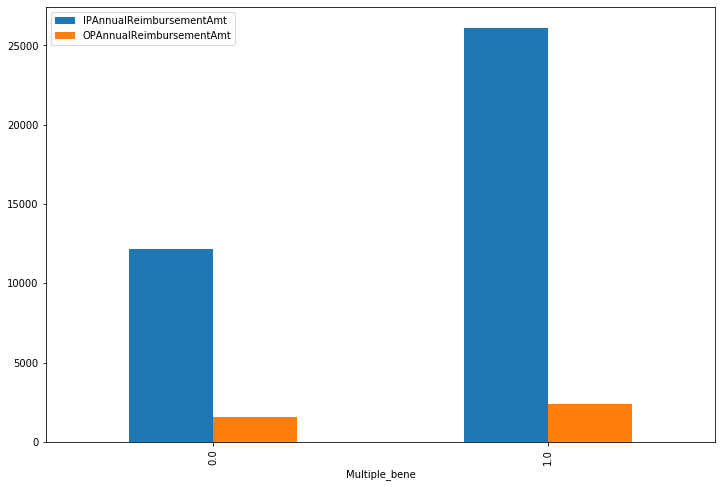

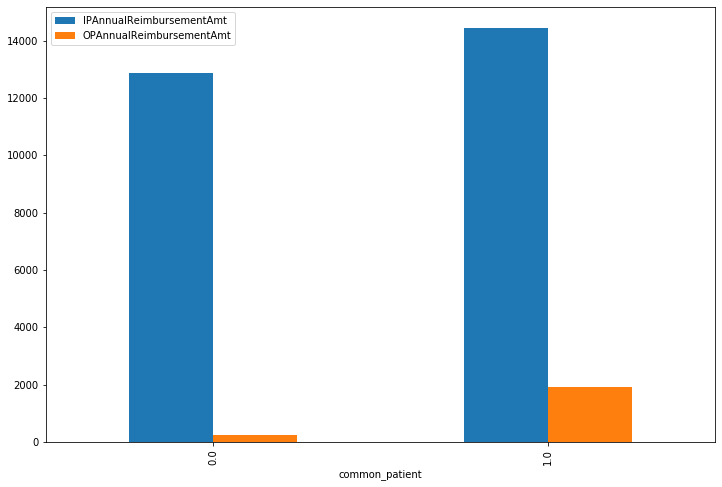

In [764]:
for feature in char_inpatients:
    charact = Reim_in.groupby(feature)[['IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt']].mean()
    charact.plot.bar()

## From the prospect of the providers, the sum of reimbursed amounts and deductibles are flowing to the providers. Based on this, analyze which types of patients contribute more to the providers in terms of the aggregate charges or the average charge per visit.

In [767]:
inpatient_train.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'isdecesed', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5

In [776]:
Reim_in['TotalAmount'] = Reim_in['InscClaimAmtReimbursed'] + Reim_in['DeductibleAmtPaid']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [777]:
Reim_in['DeductibleAmtPaid'].value_counts()

1068.0    30928
0.0         361
Name: DeductibleAmtPaid, dtype: int64

In [779]:
Reim_in.head(2)

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,isdecesed,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,noPhysician,PotentialFraud,chronic_count,Multiple_bene,both_provider,common_patient,Age,TotalAmount
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,False,Yes,7,1.0,1.0,0.0,66,27068.0
1,BENE17521,1913-12-01,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,0,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,False,Yes,5,0.0,1.0,1.0,96,20068.0


In [780]:
for feature in char_inpatients:
    charact = Reim_in.groupby(feature)[['TotalAmount']].mean()
    print (charact)

         TotalAmount
Gender              
1       11149.446844
2       11080.734889
       TotalAmount
Race              
1     11118.722430
2     11023.258746
3     11053.570896
5     11283.430442
      TotalAmount
Age              
26    9618.000000
27   11191.214286
28   10024.916667
29   10135.487179
30    9868.000000
..            ...
96   10466.646465
97    9714.099010
98   10129.887006
99   10072.301075
100  11227.317073

[75 rows x 1 columns]
        TotalAmount
State              
1      10629.618574
2      11047.591837
3      10710.013029
4      10672.134293
5      10932.342115
6      11582.147139
7      11015.427386
8      11303.820896
9       9712.067797
10     11287.895096
11     11303.264865
12     12855.435294
13     11600.448980
14     10384.438314
15     11545.316770
16     11510.134831
17     10428.272109
18     10610.420664
19     10372.412758
20     10560.156863
21     11256.948640
22     11408.969521
23     10213.290870
24     11565.876686
25     11094.677804
26   

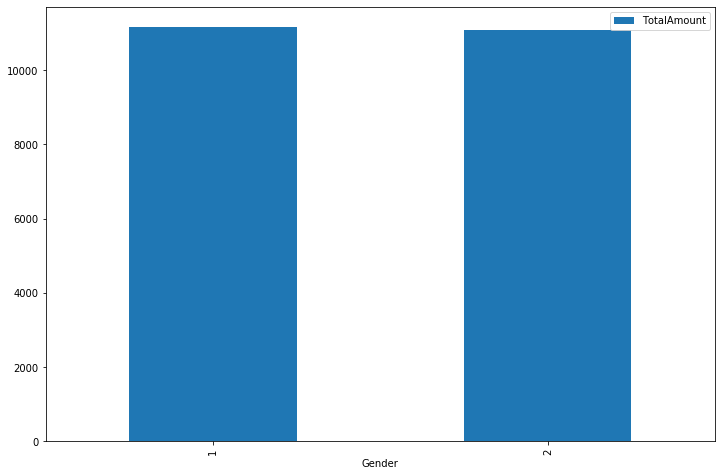

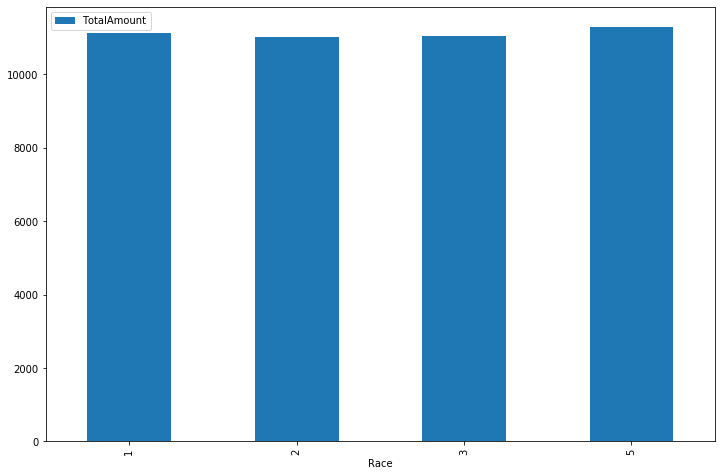

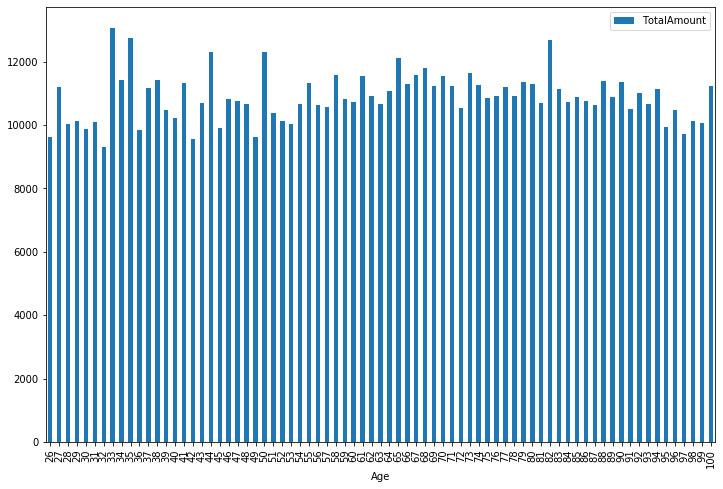

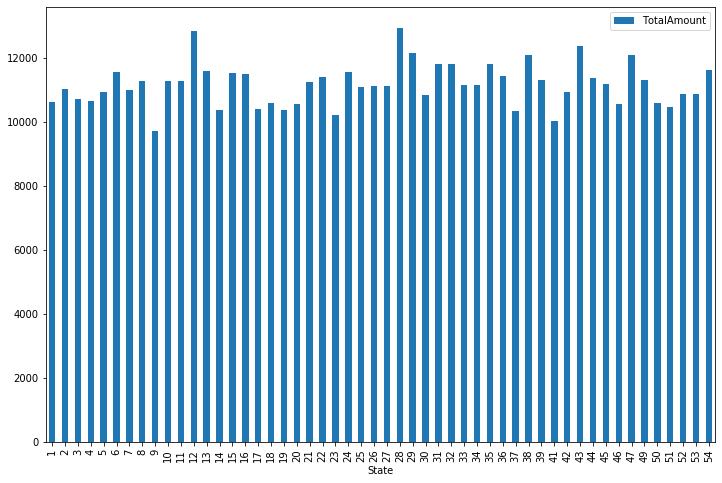

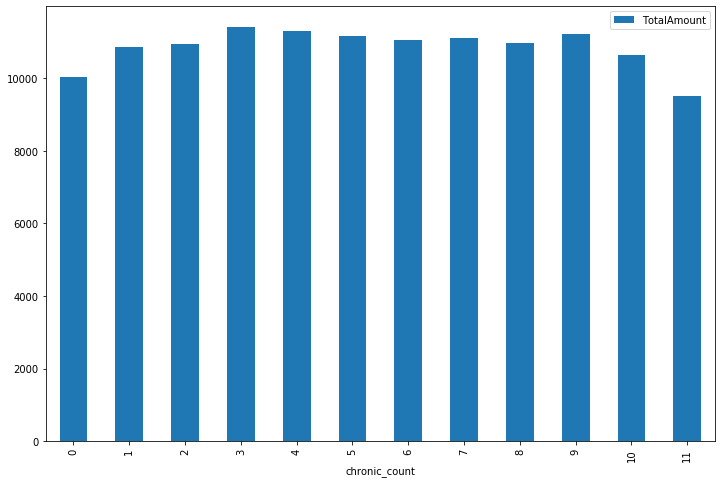

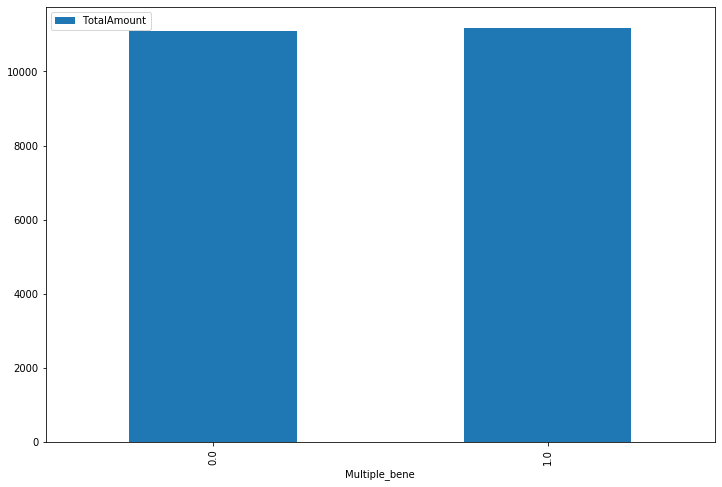

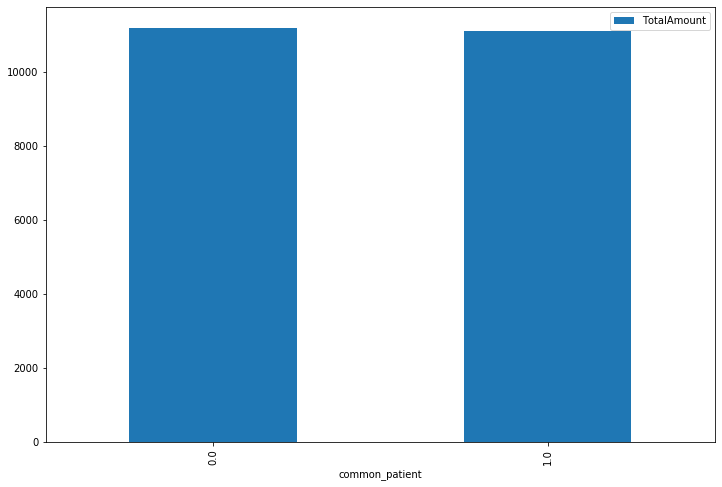

In [781]:
for feature in char_inpatients:
    charact = Reim_in.groupby(feature)[['TotalAmount']].mean()
    charact.plot.bar()

## Based on the attribute ClaimStartDt, analyze the weekly service volume variations. What are the weekly patterns (weekly seasonalities) you observe for the demands on inpatient or outpatient services?

In [792]:
inpatient_train['ClaimStartWeek'] = inpatient_train['ClaimStartDt'].dt.week.astype(int)

In [793]:
outpatient_train['ClaimStartWeek'] = outpatient_train['ClaimStartDt'].dt.week.astype(int)

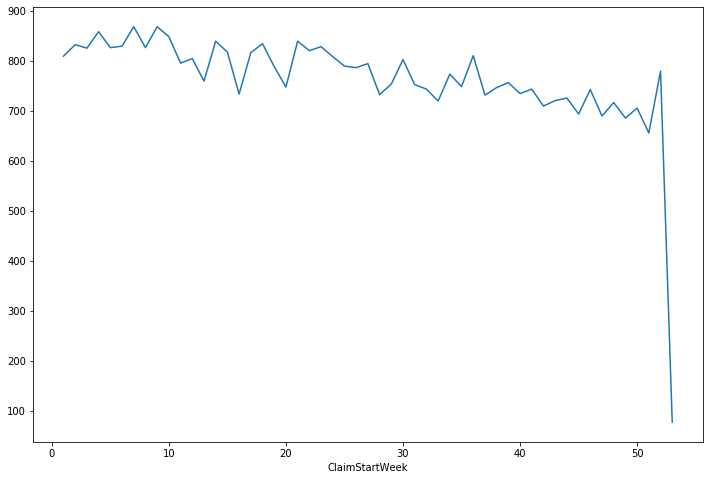

In [798]:
inpatient_train.groupby('ClaimStartWeek')['ClaimID'].count().plot.line()

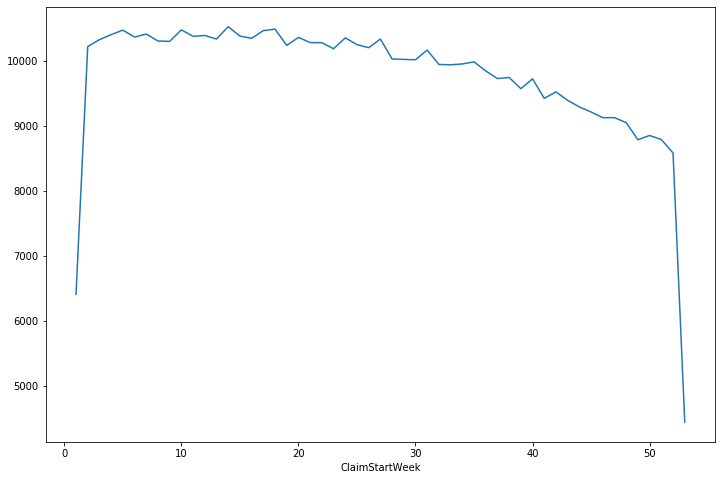

In [800]:
outpatient_train.groupby('ClaimStartWeek')['ClaimID'].count().plot.line()

The inpatient claim flow does follow any specific pattern. However the outpatient have higher claims in begining of the year which gradually decreses at the end of the year

## Identify the top  5  most frequent ClmAdmitDiagnosisCodes and trace their weekly seasonalities. Display the patterns you find. 

In [801]:
inpatient_train.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'isdecesed', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5

In [852]:
inpatient_train.groupby('ClmAdmitDiagnosisCode')['ClaimID'].count().sort_values(ascending = False)


ClmAdmitDiagnosisCode
78650    1731
78605    1669
486      1438
4280     1106
7802     1018
         ... 
34692       1
71895       1
34611       1
71897       1
V7284       1
Name: ClaimID, Length: 1928, dtype: int64

In [853]:
top5_code = ['78650', '78605', '486', '4280', '7802']

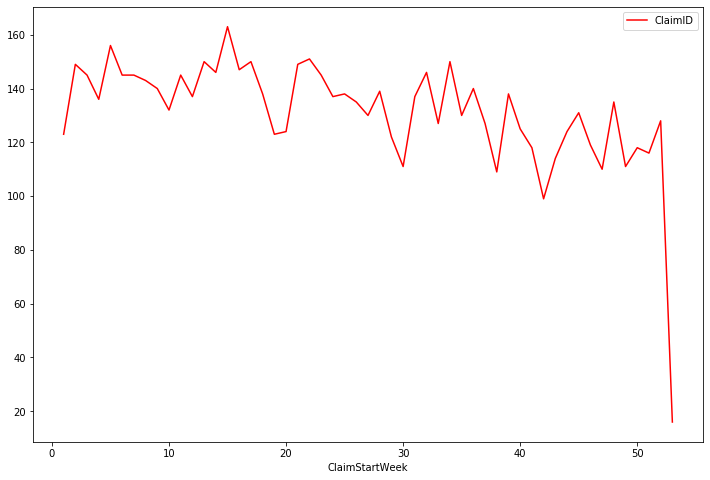

In [887]:
inpatient_train[inpatient_train['ClmAdmitDiagnosisCode'].isin(top5_code)]\
    .groupby('ClaimStartWeek')[['ClaimID']].count().plot.line(color = 'red')

In [890]:
outpatient_train.groupby('ClmAdmitDiagnosisCode')['ClaimID'].count().sort_values(ascending = False).head(6)

ClmAdmitDiagnosisCode
0        412312
V7612      4074
42731      3001
4019       2627
25000      2346
V5883      1871
Name: ClaimID, dtype: int64

In [891]:
top5_code2 = ['V7612', '42731', '4019', '25000', 'V5883']

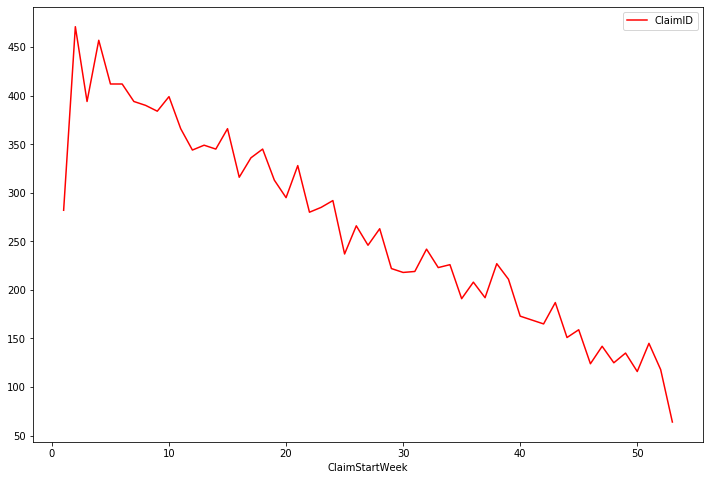

In [894]:
outpatient_train[outpatient_train['ClmAdmitDiagnosisCode'].isin(top5_code2)]\
        .groupby('ClaimStartWeek')[['ClaimID']].count().plot.line(color = 'red')

## For the inpatient patients, is there any pattern between the durations of the treatments and the patient attributes?

In [901]:
inpatient_train['hospital_stay'] = (inpatient_train['DischargeDt'] - inpatient_train['AdmissionDt']).dt.days.astype(int)

In [903]:
inpatient_train['hospital_stay'].max()

35

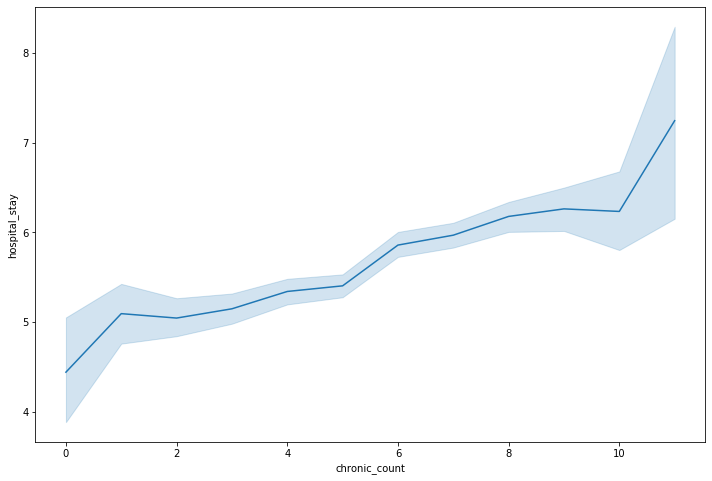

In [911]:
#patient chronic condition and hospital_stay
sns.lineplot(data = inpatient_train, x = 'chronic_count', y = 'hospital_stay')

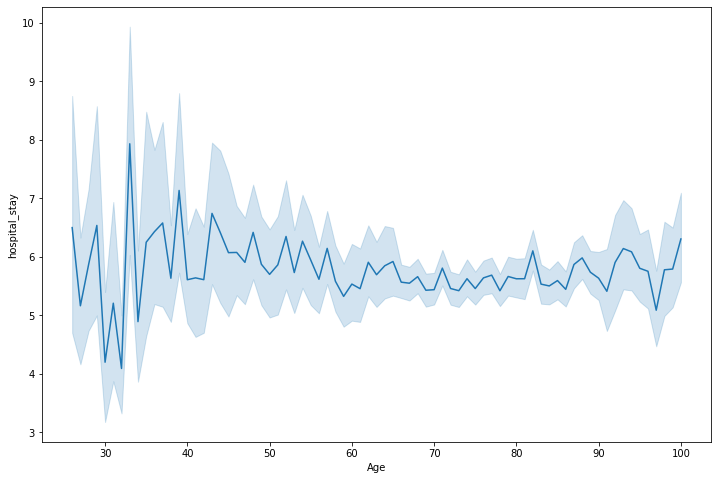

In [910]:
#patient age and hospital_stay 
sns.lineplot(data = inpatient_train, x = 'Age', y = 'hospital_stay')

## For the monthly inpatient/outpatient claim counts of all the providers, please analyze the table of provider-month matrices and report any interesting findings.

In [912]:
inpatient_train['ClaimMonth'] = inpatient_train['ClaimStartDt'].dt.month.astype(int)

In [917]:
outpatient_train['ClaimMonth'] = outpatient_train['ClaimStartDt'].dt.month.astype(int)

In [916]:
pd.pivot_table(inpatient_train, index = ['Provider', 'ClaimMonth'], values = 'ClaimID', aggfunc = 'count')

ClaimID
Provider ClaimMonth         
PRV51001 2                 2
         5                 2
         7                 1
PRV51003 1                 6
         2                 9
...                      ...
PRV57757 7                 1
         9                 1
         10                1
         11                1
         12                1

[13096 rows x 1 columns]

In [918]:
pd.pivot_table(outpatient_train, index = ['Provider', 'ClaimMonth'], values = 'ClaimID', aggfunc = 'count')

ClaimID
Provider ClaimMonth         
PRV51001 1                 2
         2                 2
         3                 3
         4                 2
         5                 3
...                      ...
PRV57763 8                16
         9                18
         10                9
         11               13
         12                6

[46575 rows x 1 columns]

## Study the distributions of InscClaimAmtReimbursed, DeductibleAmtPaid for both inpatient and outpatient services 

In [923]:
inpatient_train['DeductibleAmtPaid'].value_counts()

1068.0    39575
0.0         899
Name: DeductibleAmtPaid, dtype: int64

In [927]:
inpatient_train['Amount_claimed'] = inpatient_train['InscClaimAmtReimbursed'] + inpatient_train['DeductibleAmtPaid']

In [933]:
outpatient_train['Amount_claimed'] = outpatient_train['InscClaimAmtReimbursed'] + outpatient_train['DeductibleAmtPaid']

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


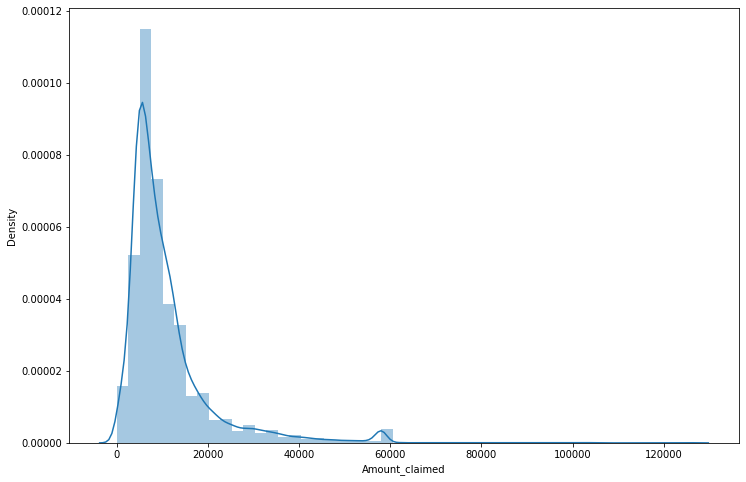

In [945]:
sns.distplot(inpatient_train['Amount_claimed'])


/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


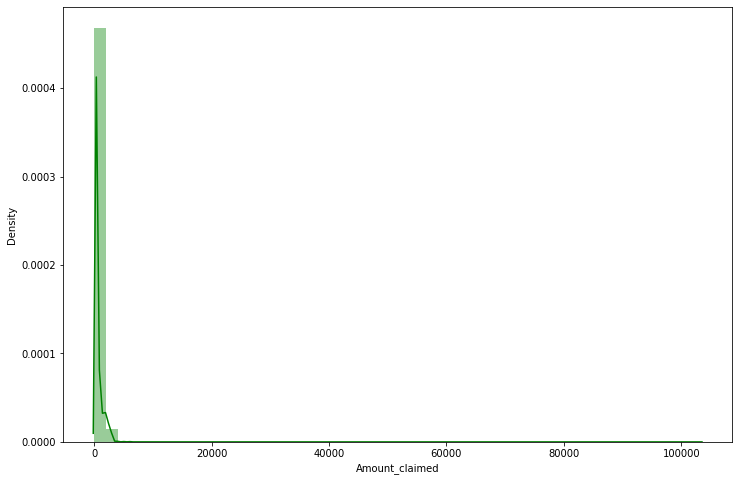

In [947]:
sns.distplot(outpatient_train['Amount_claimed'], color = 'green')

The provider bills more money for the inpatients which is shown by the graph with the right skew and the amount billed for the outpatient have the sharp rise and will be comparatively lessas expected.

## Study the distributions of insurance covered percentages InscClaimAmtReimbursed/(InscClaimAmtReimbursed+DeductibleAmtPaid).

In [942]:
inpatient_train['InscCoveragePercent'] = inpatient_train['InscClaimAmtReimbursed']/inpatient_train['Amount_claimed']*100

In [943]:
outpatient_train['InscCoveragePercent'] = outpatient_train['InscClaimAmtReimbursed']/outpatient_train['Amount_claimed'] *100

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


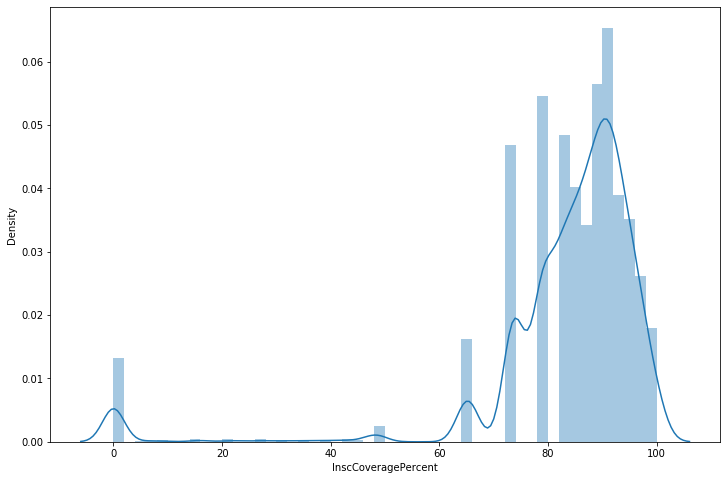

In [948]:
sns.distplot(inpatient_train['InscCoveragePercent'])


/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


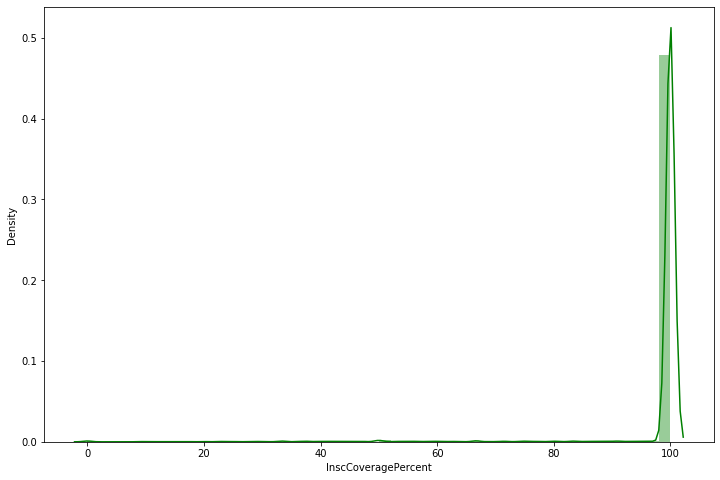

In [949]:
sns.distplot(outpatient_train['InscCoveragePercent'], color = 'green')

Outpatients are mostly covered while the inpatients varies from not covered to almost fully covered.

## Study the distributions of the durations of average insurance claims (end-start) of the providers? Box-plot/violin-plot based on the PotentialFraud flag. Do you find any differences for none-potential fraud vs potential-fraud providers?

In [950]:
inpatient_train.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'isdecesed', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5

In [951]:
inpatient_train['ClaimDuration'] = (inpatient_train['ClaimEndDt'] - inpatient_train['ClaimStartDt']).dt.days

In [952]:
outpatient_train['ClaimDuration'] = (outpatient_train['ClaimEndDt'] - outpatient_train['ClaimStartDt']).dt.days

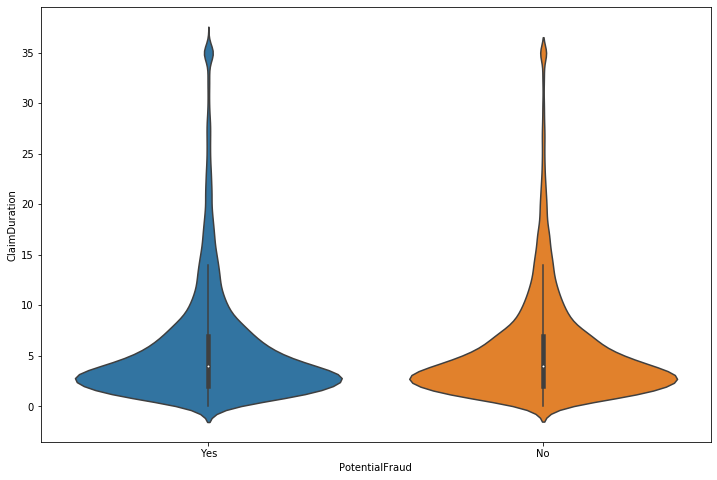

In [955]:
sns.violinplot(data = inpatient_train, x = 'PotentialFraud', y = 'ClaimDuration')

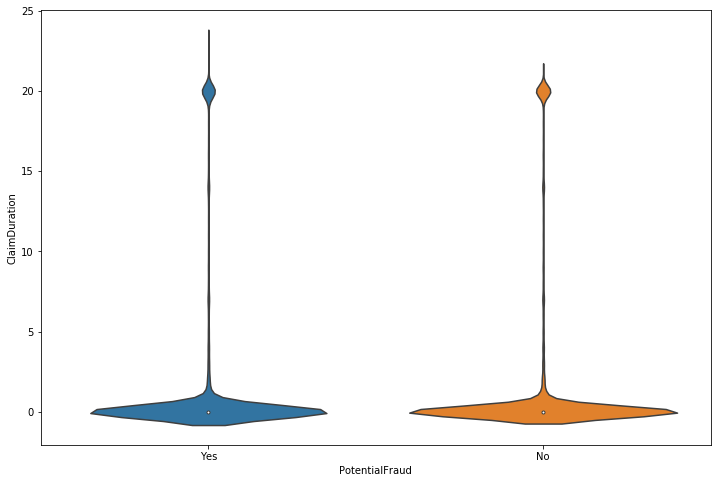

In [956]:
sns.violinplot(data = outpatient_train, x = 'PotentialFraud', y = 'ClaimDuration')

## How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed+DeductibleAmtPaid?

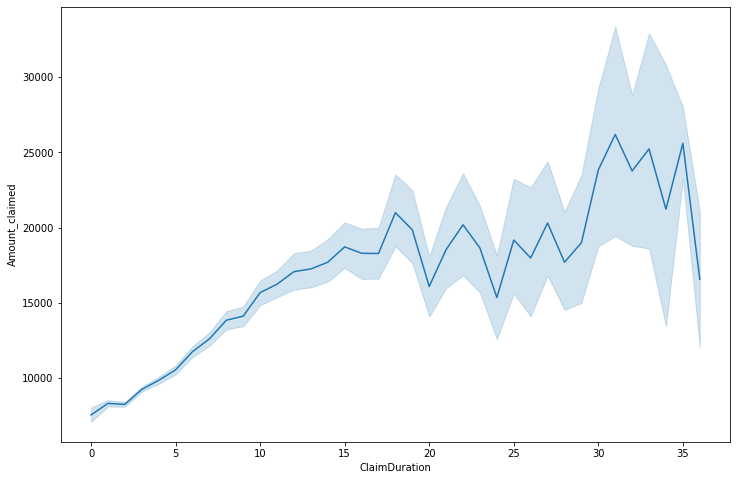

In [971]:
sns.lineplot(data = inpatient_train, x = 'ClaimDuration', y = 'Amount_claimed')

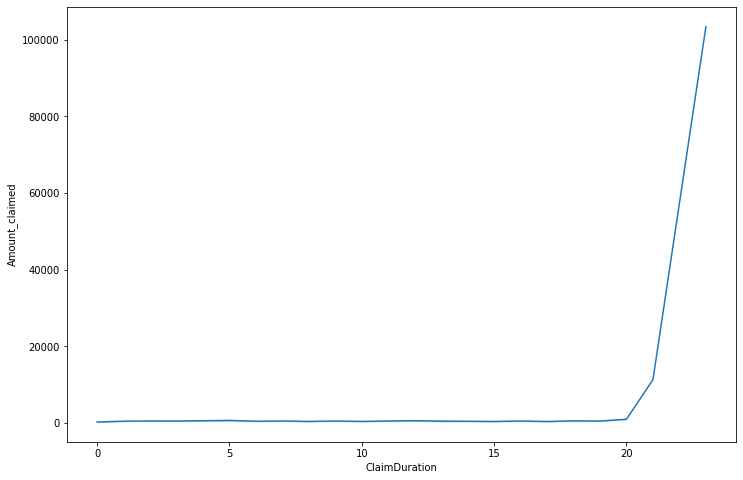

In [972]:
sns.lineplot(data = outpatient_train, x = ç, y = 'Amount_claimed')

## Consider mean daily total charges (i.e. total charge/duration), please describe their distribution. How do the Potential Fraud flag affect the distribution patterns?

In [974]:
inpatient_train['mean_dailycharge'] = inpatient_train['Amount_claimed']/ inpatient_train['ClaimDuration']

In [977]:
inpatient_train['mean_dailycharge']

0        4511.333333
1        1672.333333
2        1003.777778
3        3517.000000
4        1017.000000
            ...     
40469    1866.857143
40470     866.857143
40471    1883.500000
40472            inf
40473    1009.714286
Name: mean_dailycharge, Length: 40474, dtype: float64

In [966]:
inpatient_train['Amount_claimed']

0        27068.0
1        20068.0
2        18068.0
3        14068.0
4         4068.0
          ...   
40469    13068.0
40470     6068.0
40471    15068.0
40472    11068.0
40473     7068.0
Name: Amount_claimed, Length: 40474, dtype: float64

In [967]:
inpatient_train['hospital_stay']

0         6
1        12
2        18
3         4
4         4
         ..
40469     7
40470     7
40471     8
40472     0
40473     7
Name: hospital_stay, Length: 40474, dtype: int64